# An Exploratory Data Analysis (EDA) of Global Municipal Solid Waste
By Jacqueline Chao

**Keywords:** _Data distribution_, _categorical data_, _exploratory data analysis_, _EDA_, _estimate of location_, _estimate of variability_, _Gaussian Distribution_, _Normal Distribution_, _numeric data_, _Python_, _skewness_, _statistical moment_

**Table of Contents:**
1. [A Brief Introduction](#section_1)
    1. [Guiding Questions](#section_1a)
    2. [A Note on the Data](#section_1b)
2. [Identifying Potentially Problematic Data](#section_2)
    1. [Duplicate Values](#section_2a)
    2. [Null Values](#section_2b)
    3. [Outliers](#section_2c)
    3. [Bad Categorical Data](#section_2d)
3. [Analyzing the Data](#section_3)
    1. [Top (and Bottom) Waste-generating Countries](#section_3a)
    2. [The Composition of Our Waste](#section_3b)
    3. [On "Special" Wastes](#section_3c)
    4. [Possible Factors of Total Municipal Solid Waste](#section_3d)
    5. [How We're Disposing of Our Waste](#section_3e)
4. [~Conclusions~ Discussion](#section_4)

<a id='section_1'></a>
## 1. A Brief Introduction
This Python project is an exploratory data analysis, or EDA for short, of the country-level data set of the World Bank's "What a Waste" project's global [database](https://datacatalog.worldbank.org/search/dataset/0039597).

Exploratory data analysis is a preliminary step in the typical data science project, in which a clearer understanding of the data in question is gained. This is accomplished by using a toolkit of statistical techniques (e.g., calculating an estimate of location) and data visualizations (e.g., drawing bar charts).

In light of the general goal of exploratory data analysis, my main goal with respect to this project is to further my knowledge of the state of global municipal solid waste today. I also wish to practice some of the data science skills that I've picked up over time.

Provided that the given data set observes 217 countries and has information on up to 51 different variables for each of them, the data set does not have an insubstantial amount of data to work with. As such, I determined that it would be helpful to put together sets of guiding questions to define a primary scope of my analysis.

<a id='section_1a'></a>
### a. Guiding Questions
1. Which countries generate the most total municipal solid waste? Which countries have the highest per capita municipal solid waste? Are the countries that generate the most total municipal solid waste the same as the countries that have the highest per capita municipal solid waste? (These questions could be modified to instead ask about the least total municipal solid waste generating countries and the lowest per capita municipal solid waste having countries.)
2. What is the global composition of municipal solid waste? What is the United States' composition of municipal solid waste? Are there any notable differences between the municipal solid waste compositions of countries of different income levels or regions?
3. How much of each kind of "special waste" (e.g., agricultural waste) is being generated globally? What percentage of global total special waste does each kind of special waste have?
4. How do other variables (e.g., population) relate to the total municipal and the per capita municipal solid waste of a country?
5. How is the world disposing of their municipal solid and special waste? Of the variables available, which might have a relationship with the number of available disposal options for a country?

I was able to come up with these questions after doing a brief tour of the data to understand what information was available. This is not a comprehensive list of all of the questions that I had come up with, but it is a good starting point for a purposeful analysis.

<a id='section_1b'></a>
### b. A Note on the Data
The creators of the data set write in a [report](https://openknowledge.worldbank.org/handle/10986/30317) on it that, "The data reported are predominantly from 2011-17, although overall data span about two decades." (pg. 13) However, they state that, "To enable cross-comparability of data, all national waste generation statistics are adjusted to a common year..." (pg. 13) From what I understand, it seems that getting a comprehensive collection of waste data from each country involves some degree of difficulty and, in an effort to "fill in the gaps" so to speak, the authors collected waste data from across time for countries that they found were appropriate to do so. Then, they applied some technique to standardize the data for a particular year, which was 2016.

#### i. Possible Effects on the Data
One thing that I noticed when I was looking over the data was that sometimes waste composition percentages would not add up to an exact 100 percent. In some cases, this is probably due to a lack of data. However, there are several countries for which the sum of its waste composition percentages would be near 100 percent. For example, take the country of Angola:

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# read csv file
df = pd.read_csv("What a Waste Country-level Dataset.csv")

# select Angola's row of data
df[df['country_name']=='Angola']

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
2,AGO,SSF,Angola,LMC,8036.69043,51.8,6.7,4.4,11.5,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# sum up its waste composition percentages
df.loc[df['country_name']=='Angola','composition_food_organic_waste_percent':'composition_yard_garden_green_waste_percent'].sum(axis=1)

2    99.8
dtype: float64

As you can see, the sum of Angola's waste composition percentages is near 100 percent.

This made me wonder if there were any other countries like Angola and, if so, what they were and how many of them there were:

In [4]:
# select countries which waste composition percentages do not add up to 100
df_crude_waste_composition_percentages = df.loc[:,'composition_food_organic_waste_percent':'composition_yard_garden_green_waste_percent']
df[df_crude_waste_composition_percentages.sum(axis=1)!=100]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,13724.058594,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
6,ARG,LCN,Argentina,HIC,23550.099609,38.740000,3.160000,1.840000,15.360000,13.960000,...,8.9,NaN,NaN,22.6,NaN,6.0,62.5,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,VEN,LCN,"Venezuela, RB",UMC,14269.673828,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,VNM,EAS,Vietnam,LMC,5089.411133,61.900000,2.180000,0.580000,15.180000,5.200000,...,NaN,NaN,NaN,NaN,NaN,23.0,NaN,62.0,NaN,NaN
210,VUT,EAS,Vanuatu,LMC,3061.787354,73.400000,5.400000,3.800000,5.700000,4.050000,...,NaN,NaN,NaN,11.3,NaN,37.0,NaN,51.7,NaN,NaN
214,ZAF,SSF,South Africa,UMC,12666.607422,16.381655,5.200216,16.910461,45.020646,9.396918,...,72.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN


There are 100 countries with waste composition percentages that just don't add up to 100 percent.

As I said before, it may just be that data for some of these countries weren't able to be determined. However, for another set of these countries, these data were able to be determined. If, for example, Angola's waste composition percentage data were comprehensive, then it appears that those data were rough numbers. This made me wonder how large the waste composition percentage sums could get:

In [5]:
max(df_crude_waste_composition_percentages.sum(axis=1).values)

116.65

As you can see, a waste composition percentage sum could get as high as 116.65 percent. The country that this figure belongs to is:

In [6]:
df[df_crude_waste_composition_percentages.sum(axis=1)==116.65]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
115,LTU,ECS,Lithuania,HIC,37278.304688,40.4,8.65,2.75,44.05,10.05,...,NaN,11.54,54.0,NaN,NaN,22.92,NaN,1.39,NaN,NaN


Going back to how the creators of this data set applied some procedure on the data to standardize them to a common year, my thinking is that this procedure is not a perfect process, meaning that it may sometimes result in data that doesn't make sense upon closer inspection. I don't think that this is by any means disastrous for the purposes of this project, but it is something that I thought was important to take note of.

<a id='section_2'></a>
## 2. Identifying Potentially Problematic Data
Following an initial meditation on what guiding questions I have, I wanted to get a better sense of the quality of the data that I was working with. This is an important stage of exploratory data analysis because the accuracy of my analyses and the confidence of my conclusions largely hinge on making sure I have good data.

<a id='section_2a'></a>
### a. Duplicate Values
Since duplicate observations or individuals may affect the results given by analyses, I first determine whether such duplicates exist:

In [133]:
df.duplicated().any()

False

The above code determines whether any row of data has a duplicate, returning a list of Boolean values (e.g., True), which is then checked for to see if any of these values were True. Since the result of this search is False, no duplicates were found.

<a id='section_2b'></a>
### b. Null Values
First, I wanted to figure out what data I _didn't_ have to work with. In other words, what holes in the data exist? If, for example, values for the total municipal solid waste variable tend to be null for Southeast Asian countries, then whatever analysis I perform on total municipal solid waste may not be applicable to Southeast Asian countries, and that would be important to note.

In [7]:
# determine how many null values there are for each variable
col_null_counts_se = df.apply(lambda col: sum(col.isnull()), axis=0)
col_null_counts_se

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               1
income_id                                                                                  0
gdp                                                                                        1
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 47
composition_other_percent                                                                 42
composition_paper_cardboard_percent                                                       41
composition_plastic_percent                                           

A quick glance over these numbers reveals to us that there are generally quite a lot of null values for each variable. Below, these quantities are shown visually:

Text(0, 0.5, 'Null Value Count')

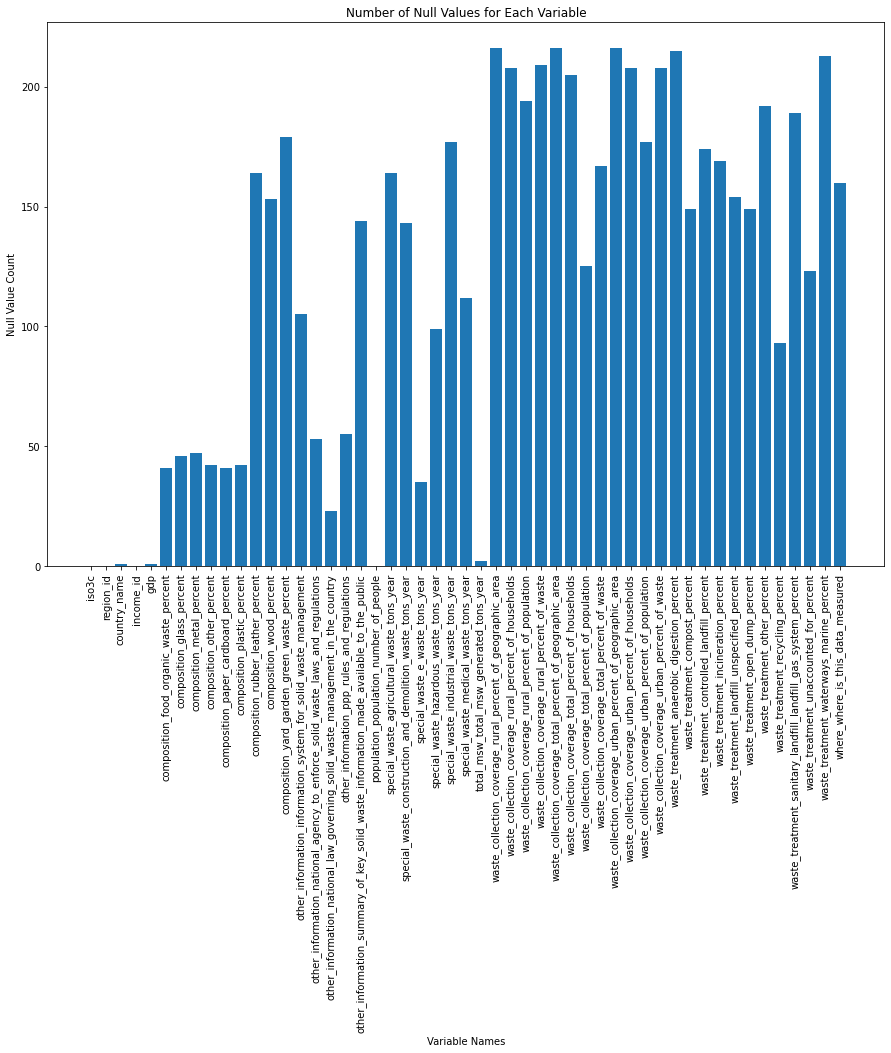

In [8]:
# visually show quantities of null values
var_names = col_null_counts_se.index
col_null_counts = col_null_counts_se.values

plt.figure(figsize=(15, 10))
plt.bar(var_names, col_null_counts)

plt.title('Number of Null Values for Each Variable')
plt.xlabel('Variable Names')
plt.xticks(rotation='vertical')
plt.ylabel('Null Value Count')

A simple practice may be to just remove or set aside variables that you're not interested in and/or contain a lot of null values. Given that we are performing exploratory data analysis, and, therefore, should try to retain as many variables as possible, however, I thought it would be worthwhile to not do that for the potential insights we may still be able to glean. Also, if we were to do that, then we would end up with only a handful of variables to consider. Another simple practice may be to just remove or set aside observations/individuals (rows of data) that contain a lot of null values. However, since for many variables there are a lot of null values, it's unlikely that there are very many observations without any null values. As a matter of fact, there are none:

In [9]:
# determine how many null values there are for each country
row_null_counts_se = df.apply(lambda x: sum(x.isnull()), axis=1)

# determine if there's any country w/o a null value for any variable
row_null_counts = row_null_counts_se.values
print('Number of countries w/ no gaps in data: ' + str(np.count_nonzero(row_null_counts==0)))

Number of countries w/ no gaps in data: 0


This may lead one to wonder what the average number of null values for each country is:

In [10]:
np.mean(row_null_counts)

28.56221198156682

As you can see, it wouldn't be a good idea to remove observations that contain null values since all of them do. Thus, I thought that it would be best to keep the data as it was, and note that the results of my later analyses may be applied only to a subset of the world's countries.

As shown in the above bar chart, there were some variables for which there were only a few null values, such as country_name. There were also some variables for which there only a few _non-null_ values. I was curious to know which countries those values belonged to, so below is the following code for that investigation:

In [11]:
df[df["country_name"].isnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
198,TWN,EAS,NaN,HIC,57362.925781,23.34,4.11,3.07,14.11,30.01,...,NaN,64.2,34.8,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [12]:
df[df["gdp"].isnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
183,SXM,LCN,Sint Maarten (Dutch part),HIC,NaN,46.0,7.0,7.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[df["total_msw_total_msw_generated_tons_year"].isnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
183,SXM,LCN,Sint Maarten (Dutch part),HIC,NaN,46.0,7.0,7.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,TCA,LCN,Turks and Caicos Islands,HIC,28174.482422,21.8,20.5,7.6,2.4,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df[df["waste_collection_coverage_rural_percent_of_geographic_area"].notnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
76,GRC,ECS,Greece,HIC,30465.449219,40.0,3.0,3.0,9.0,29.0,...,NaN,NaN,80.0,NaN,1.0,19.0,NaN,NaN,NaN,NaN


In [15]:
df[df["waste_collection_coverage_total_percent_of_geographic_area"].notnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
76,GRC,ECS,Greece,HIC,30465.449219,40.0,3.0,3.0,9.0,29.0,...,NaN,NaN,80.0,NaN,1.0,19.0,NaN,NaN,NaN,NaN


In [16]:
df[df["waste_collection_coverage_urban_percent_of_geographic_area"].notnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
76,GRC,ECS,Greece,HIC,30465.449219,40.0,3.0,3.0,9.0,29.0,...,NaN,NaN,80.0,NaN,1.0,19.0,NaN,NaN,NaN,NaN


In [17]:
df[df["waste_treatment_anaerobic_digestion_percent"].notnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
91,IRN,MEA,"Iran, Islamic Rep.",UMC,14535.862305,72.9,1.9,2.3,5.0,7.3,...,10.0,0.4,NaN,72.0,NaN,5.0,NaN,0.3,NaN,Source
98,JPN,EAS,Japan,HIC,41309.957031,36.0,5.0,4.0,6.0,33.0,...,1.1,80.2,NaN,NaN,13.3,4.9,NaN,NaN,NaN,Source


In [18]:
df[df["waste_treatment_waterways_marine_percent"].notnull()]

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
9,ATG,LCN,Antigua and Barbuda,HIC,17965.501953,46.0,7.00,7.00,12.0,15.00,...,98.68,NaN,NaN,NaN,NaN,NaN,NaN,1.14,0.1,Disposal Site
124,MDV,SAS,Maldives,UMC,17284.609375,24.0,NaN,1.00,1.0,6.00,...,NaN,6.0,NaN,NaN,24.0,NaN,NaN,NaN,63.0,Ministry forecast
170,SLB,EAS,Solomon Islands,LMC,2596.452881,42.8,6.65,13.15,3.7,6.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,81.0,NaN
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.0,1.00,6.00,6.0,7.00,...,12.00,NaN,NaN,25.0,NaN,8.0,NaN,47.00,8.0,Other


<a id='section_2c'></a>
### c. Outliers
With respect to numeric variables, such as Gross Domestic Product (GDP), extreme values or outliers may exist. Outliers may be the result of one of a couple of things. They could be errors, a value in a different unit of measurement than expected, for example. Or, they could be anomalies, belonging to a set of special cases which deserve further consideration.

Given this data set, I presume that the data are correct, having no hand in or clear idea of the data collection process. In other words, I took the truth of the data for granted.

For the detection of anomalies, I decided to use the Interquartile Range (IQR), which is the difference between the 75th percentile/third quartile (Q3) and the 25th percentile/1st quartile (Q1) of data. To be more specific, values that fall below 1.5 * Q1 or (exclusive) go above 1.5 * Q3 were deemed outliers.

The rationale behind this is that the IQR is a number that we can scale, and depending on how much we scale the IQR by, we can obtain a new number which may or may not actually be in our data, but which maps to some number of standard deviations away from the mean of our sampling distribution, which we assume follows the Normal Distribution. By convention, values which fall below 3 or (exclusive) go above 3 standard deviations of the mean are deemed outliers (in a Normal Distribution). Scaling the IQR by 1.5 enables us to roughly get to those values. Moreover, the value of the IQR is not some arbitrary number. As stated before, it is the difference between Q3 and Q1. By relying on these quantiles, the IQR is robust to extreme values. In other words, while there may be a particularly low or high data point in the sample, the IQR relies on the greater mass of data for its calculation.

How can we assume that the sampling distributions of our various variables follow the Normal Distribution? So long as we satisfy the conditions of the Central Limit Theorem (CLT), this assumption may be made.

Going back to my guiding questions, there is really only a subset of of the numeric variables that I'm most interested in. Thus, my outlier investigations apply to those only. Below, I use the IQR of those variables to identify their outliers:

In [19]:
# get pertinent values (total_msw_total_msw_generated_tons_year)
total_msw_desc = df['total_msw_total_msw_generated_tons_year'].describe()
total_msw_desc

count    2.150000e+02
mean     9.638990e+06
std      3.600216e+07
min      3.989486e+03
25%      2.138795e+05
50%      1.787400e+06
75%      5.282711e+06
max      3.950814e+08
Name: total_msw_total_msw_generated_tons_year, dtype: float64

In [20]:
# get IQR, bottom fence, & top fence (total_msw_total_msw_generated_tons_year)
total_msw_IQR = total_msw_desc['75%'] - total_msw_desc['25%']
print('total_msw_IQR: ' + str(total_msw_IQR))
total_msw_bottom_fence = total_msw_desc['25%'] - (1.5 * total_msw_IQR)
print('total_msw_bottom_fence: ' + str(total_msw_bottom_fence))
total_msw_top_fence = total_msw_desc['75%'] + (1.5 * total_msw_IQR)
print('total_msw_top_fence: ' + str(total_msw_top_fence))

total_msw_IQR: 5068831.603266967
total_msw_bottom_fence: -7389367.936900451
total_msw_top_fence: 12885958.476167418


In [21]:
# get outliers (total_msw_total_msw_generated_tons_year)
total_msw_outliers = df[(df['total_msw_total_msw_generated_tons_year'] < total_msw_bottom_fence) | (df['total_msw_total_msw_generated_tons_year'] > total_msw_top_fence)].sort_values(by='total_msw_total_msw_generated_tons_year', ascending=False)
total_msw_outliers[['country_name', 'total_msw_total_msw_generated_tons_year']]

,country_name,total_msw_total_msw_generated_tons_year
36,China,3.950814e+08
203,United States,2.652245e+08
89,India,1.897500e+08
26,Brazil,7.906958e+07
87,Indonesia,6.520000e+07
164,Russian Federation,6.000000e+07
125,Mexico,5.310000e+07
50,Germany,5.062788e+07
98,Japan,4.272000e+07
64,France,3.674882e+07


Above is a list of countries that has been sorted by its total municipal solid waste generated (greatest to least). These are our outliers as determined by the aforementioned method. As you can see, China tops the list at approximately 400 million tons of total municipal solid waste. The United States follows, which is in turn followed by India. At the very bottom of the list is Malaysia at approximately 10 million tons of total municipal solid waste.

Below, a bar chart compares the total municipal solid wastes of the outliers:

Text(0, 0.5, 'Total Municipal Solid Waste')

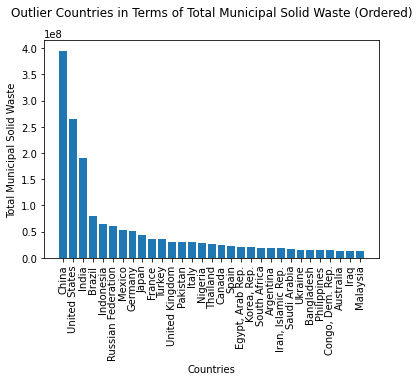

In [22]:
plt.bar(total_msw_outliers['country_name'], total_msw_outliers['total_msw_total_msw_generated_tons_year'])

plt.title('Outlier Countries in Terms of Total Municipal Solid Waste (Ordered)', y=1.0825)
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Total Municipal Solid Waste')

I was also interested in seeing what the distribution of the data would look like with and without the outliers. I was also interested in seeing what the distribution of the data for the outliers would look like. To those ends, I used box plots.

Below:

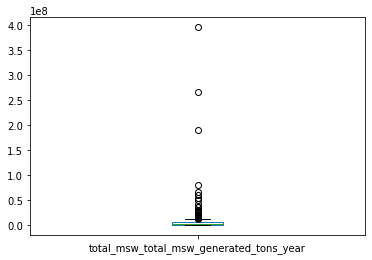

In [23]:
# make box plot for all data (total_msw_total_msw_generated_tons_year)
df['total_msw_total_msw_generated_tons_year'].plot(kind='box')
plt.show()

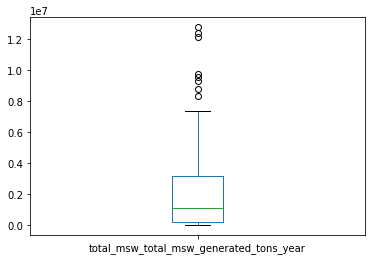

In [24]:
df_total_msw_outliers_r = df[((df['total_msw_total_msw_generated_tons_year'] >= total_msw_bottom_fence) & (df['total_msw_total_msw_generated_tons_year'] <= total_msw_top_fence) & df['country_name'].notnull())]

# make box plot for non-outlier data (total_msw_total_msw_generated_tons_year)
df.loc[((df['total_msw_total_msw_generated_tons_year'] >= total_msw_bottom_fence) & (df['total_msw_total_msw_generated_tons_year'] <= total_msw_top_fence)), 'total_msw_total_msw_generated_tons_year'].plot(kind='box')
plt.show()

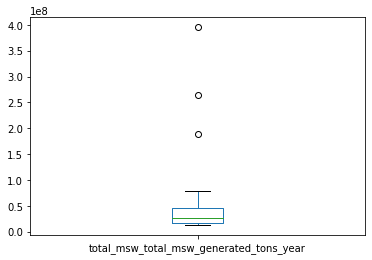

In [25]:
# make box plot for outlier data (total_msw_total_msw_generated_tons_year)
total_msw_outliers['total_msw_total_msw_generated_tons_year'].plot(kind='box')
plt.show()

In both the pre- and post-outlier removal box plots of total municipal solid waste we can see that values are more at the lower end of the number line. We observe the same thing in the box plot for the outliers.

Beyond total municipal solid waste, I was interested in learning about per capita municipal solid waste. How I judged that I should calculate this was by taking total municipal solid waste and dividing that by population.

I do this and identify per capita municipal solid waste outliers below:

In [26]:
# calculate per_capita_msw
df['per_capita_msw'] = df['total_msw_total_msw_generated_tons_year']/df['population_population_number_of_people']
df[['country_name', 'total_msw_total_msw_generated_tons_year', 'population_population_number_of_people', 'per_capita_msw']]

,country_name,total_msw_total_msw_generated_tons_year,population_population_number_of_people,per_capita_msw
0,Aruba,8.813202e+04,103187,0.854100
1,Afghanistan,5.628525e+06,34656032,0.162411
2,Angola,4.213644e+06,25096150,0.167900
3,Albania,1.087447e+06,2854191,0.381000
4,Andorra,4.300000e+04,82431,0.521648
...,...,...,...,...
212,Kosovo,3.190000e+05,1801800,0.177045
213,"Yemen, Rep.",4.836820e+06,27584212,0.175347
214,South Africa,1.845723e+07,51729344,0.356804
215,Zambia,2.608268e+06,14264756,0.182847


In [27]:
# get pertinent values (per_capita_msw)
per_capita_msw_desc = df['per_capita_msw'].describe()
per_capita_msw_desc

count    215.000000
mean       0.376462
std        0.259919
min        0.037370
25%        0.169594
50%        0.319375
75%        0.504119
max        1.384898
Name: per_capita_msw, dtype: float64

In [28]:
# get IQR, bottom fence, & top fence (per_capita_msw)
per_capita_msw_IQR = per_capita_msw_desc['75%'] - per_capita_msw_desc['25%']
print('per_capita_msw_IQR: ' + str(per_capita_msw_IQR))
per_capita_msw_bottom_fence = per_capita_msw_desc['25%'] - (1.5 * per_capita_msw_IQR)
print('per_capita_msw_bottom_fence: ' + str(per_capita_msw_bottom_fence))
per_capita_msw_top_fence = per_capita_msw_desc['75%'] + (1.5 * per_capita_msw_IQR)
print('per_capita_msw_top_fence: ' + str(per_capita_msw_top_fence))

per_capita_msw_IQR: 0.3345252841604834
per_capita_msw_bottom_fence: -0.33219413339313547
per_capita_msw_top_fence: 1.0059070032487982


In [29]:
# get outliers (per_capita_msw)
per_capita_msw_outliers = df[(df['per_capita_msw'] < per_capita_msw_bottom_fence) | (df['per_capita_msw'] > per_capita_msw_top_fence)].sort_values(by='per_capita_msw', ascending=False)
per_capita_msw_outliers[['country_name', 'per_capita_msw']]

,country_name,per_capita_msw
208,Virgin Islands (U.S.),1.384898
24,Bermuda,1.265471
65,Faeroe Islands,1.248925
121,Monaco,1.217479
157,Puerto Rico,1.200903
122,Moldova,1.120169
34,Channel Islands,1.087468
207,British Virgin Islands,1.022000
47,Cayman Islands,1.013993


Shown above are the 9 countries which are extreme in terms of their per capita municipal solid waste generation. At the top of the list with roughly 1.38 tons of solid municipal waste per year per person are the U.S. Virgin Islands. They are closely followed by Bermuda, which in turn is followed by the Faeroe Islands. At the very bottom of the list with roughly 1.01 tons of solid municipal waste per year per person are the Cayman Islands.

A bar chart that compares these outliers' per capita municipal solid waste is shown below:

Text(0, 0.5, 'Per Capita Municipal Solid Waste')

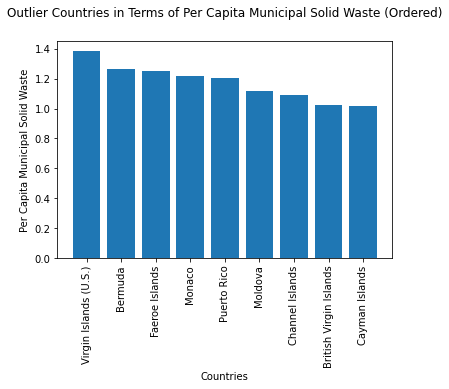

In [30]:
plt.bar(per_capita_msw_outliers['country_name'], per_capita_msw_outliers['per_capita_msw'])

plt.title('Outlier Countries in Terms of Per Capita Municipal Solid Waste (Ordered)', y=1.0825)
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Per Capita Municipal Solid Waste')

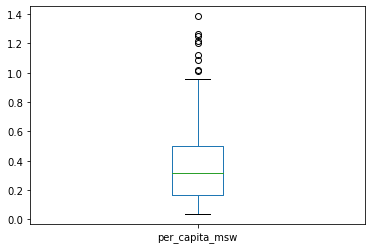

In [31]:
# make box plot for all data (per_capita_msw)
df['per_capita_msw'].plot(kind='box')
plt.show()

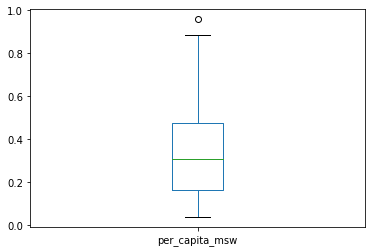

In [32]:
df_per_capita_msw_outliers_r = df[((df['per_capita_msw'] >= per_capita_msw_bottom_fence) & (df['per_capita_msw'] <= per_capita_msw_top_fence) & df['country_name'].notnull())]

# make box plot for non-outlier data (per_capita_msw)
df.loc[((df['per_capita_msw'] >= per_capita_msw_bottom_fence) & (df['per_capita_msw'] <= per_capita_msw_top_fence)), 'per_capita_msw'].plot(kind='box')
plt.show()

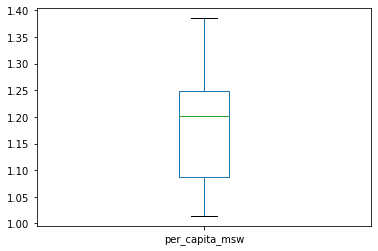

In [33]:
# make box plot for outlier data (per_capita_msw)
per_capita_msw_outliers['per_capita_msw'].plot(kind='box')
plt.show()

As we can see, post outlier-removal, per capita municipal solid waste ranges from just above 0 tons per year per person to just under 1 ton per year per person. Outlier countries in terms of this variable operate in a higher range. At their least, they generate just above 1 ton of solid municipal waste per year per person, and at their most, they generate just under 1.4 tons of solid municipal waste per year per person.

When it comes to how to handle outliers for the purposes of performing analyses, it depends on the analysis being performed. If one is performing an analysis which is sensitive to outliers, meaning that its result changes considerably when an outlier is present, then it may be best to remove outliers in the data and perform the analysis on the remaining bulk of data. However, as stated before, outliers may be anomalies or special cases that may be informative in their own right. In that case, outliers should probably not be completely disregarded, but set aside for a dedicated examination.

**Note:** This section is under development!

### d. Bad Categorical Data
Sometimes, given categorical data contain errors. These errors may be fixed if, for example, a value had been misspelled. In other words, we know what the value should've been.

In this data set, I noticed that for some of the dichotomous categorical variables of each country, values "yes" and "Yes" had been recorded. For analysis purposes, these values would be interpreted as unique values, which is not desired.

The below code shows how this might occur:

In [35]:
df['where_where_is_this_data_measured']

0                      NaN
1                    Other
2                      NaN
3      Some disposal sites
4                      NaN
              ...         
212                    NaN
213                  Other
214                    NaN
215                    NaN
216                    NaN
Name: where_where_is_this_data_measured, Length: 217, dtype: object

In [36]:
# get categorical data
df_cat = pd.concat([df.loc[:, 'region_id':'income_id'], df.loc[:, 'other_information_information_system_for_solid_waste_management':'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'], df.loc[:, ['where_where_is_this_data_measured']]])
df_cat

,region_id,country_name,income_id,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,where_where_is_this_data_measured
0,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN
1,SAS,Afghanistan,LIC,NaN,NaN,NaN,NaN,NaN,NaN
2,SSF,Angola,LMC,NaN,NaN,NaN,NaN,NaN,NaN
3,ECS,Albania,UMC,NaN,NaN,NaN,NaN,NaN,NaN
4,ECS,Andorra,HIC,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# get counts of each kind of categorical variable value
value_counts = df_cat.apply(lambda x: x.value_counts(), axis=0).T.stack() # can supply "normalize=True" to value_counts to get percentages rather than counts
value_counts

region_id                          EAS                            37.0
                                   ECS                            58.0
                                   LCN                            42.0
                                   MEA                            21.0
                                   NAC                             3.0
                                                                  ... 
where_where_is_this_data_measured  Other                          13.0
                                   Some disposal sites             1.0
                                   Source                          9.0
                                   Various                         1.0
                                   Waste generated in 8 cities     1.0
Length: 260, dtype: float64

Text(0.5, 1.0, 'other_information_national_law_governing_solid_waste_management_in_the_country')

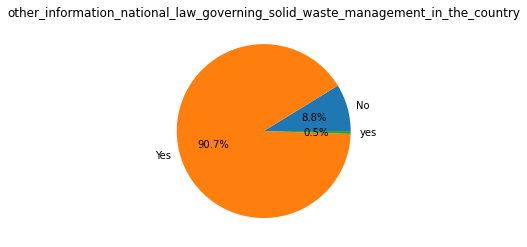

In [38]:
# make a pie chart for all data (other_information_national_law_governing_solid_waste_management_in_the_country)
plt.pie(value_counts['other_information_national_law_governing_solid_waste_management_in_the_country'].values, labels=value_counts['other_information_national_law_governing_solid_waste_management_in_the_country'].index, autopct='%1.1f%%')
plt.title('other_information_national_law_governing_solid_waste_management_in_the_country')

As shown by the pie chart above, the categorical variable concerning whether a country has national laws on the management of solid waste has 3 different possible values. However, this variable is a dichotomous categorical variable; it should really only have 2 possible responses, one for confirming that a country does indeed have national solid waste management laws and another for indicating that that country has no such laws.

To clean these data, I replaced "yes" responses with "Yes" responses:

In [39]:
# replace "yes" w/ "Yes" responses (other_information_national_law_governing_solid_waste_management_in_the_country)
cat_var_clean = df['other_information_national_law_governing_solid_waste_management_in_the_country'].replace('yes', 'Yes')

df_clean = df
df_clean['other_information_national_law_governing_solid_waste_management_in_the_country'] = cat_var_clean
df_clean

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN,0.854100
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,0.162411
2,AGO,SSF,Angola,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167900
3,ALB,ECS,Albania,UMC,13724.058594,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites,0.381000
4,AND,ECS,Andorra,HIC,43711.800781,31.200000,8.200000,2.600000,11.600000,35.100000,...,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN,0.521648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,ECS,Kosovo,LMC,9723.561523,42.000000,6.000000,6.000000,20.000000,8.000000,...,NaN,NaN,33.57,NaN,NaN,NaN,NaN,NaN,NaN,0.177045
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,...,NaN,NaN,25.00,NaN,8.0,NaN,47.0,8.0,Other,0.175347
214,ZAF,SSF,South Africa,UMC,12666.607422,16.381655,5.200216,16.910461,45.020646,9.396918,...,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,0.356804
215,ZMB,SSF,Zambia,LMC,3201.289307,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182847


In [139]:
# verify
'yes' in df_clean['other_information_national_law_governing_solid_waste_management_in_the_country'].values
df_clean['other_information_national_law_governing_solid_waste_management_in_the_country']

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
212    Yes
213    Yes
214    Yes
215    Yes
216    Yes
Name: other_information_national_law_governing_solid_waste_management_in_the_country, Length: 217, dtype: object

Text(0.5, 1.0, 'other_information_summary_of_key_solid_waste_information_made_available_to_the_public')

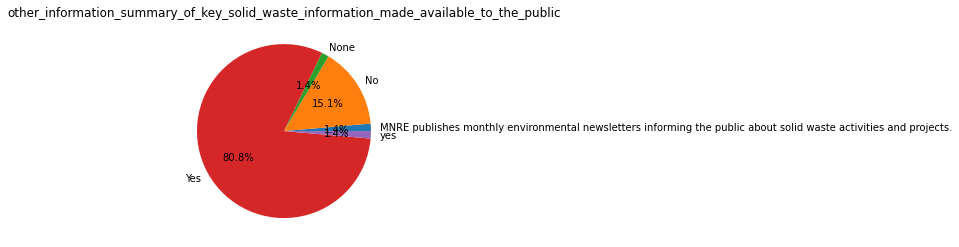

In [41]:
# make a pie chart for all data (other_information_summary_of_key_solid_waste_information_made_available_to_the_public)
plt.pie(value_counts['other_information_summary_of_key_solid_waste_information_made_available_to_the_public'].values, labels=value_counts['other_information_summary_of_key_solid_waste_information_made_available_to_the_public'].index, autopct='%1.1f%%')
plt.title('other_information_summary_of_key_solid_waste_information_made_available_to_the_public')

Like with the last variable, this variable's values could also use some clean-up. This variable is concerned about whether information about the state of solid waste and solid waste management is accessible or disseminated to the public. Thus, this variable is a dichotomous categorical variable as well.

To clean up the values for this variable, "yes" and "MNRE publishes monthly environmental newsletters informing the public about solid waste activities and projects" responses were converted to "Yes" responses and "None" responses were converted to "No" responses:

In [42]:
# replace certain responses for consistency (other_information_summary_of_key_solid_waste_information_made_available_to_the_public)
cat_var_clean = df['other_information_summary_of_key_solid_waste_information_made_available_to_the_public'].replace('yes', 'Yes').replace('MNRE publishes monthly environmental newsletters informing the public about solid waste activities and projects.', 'Yes').replace('None', 'No')

df_clean['other_information_summary_of_key_solid_waste_information_made_available_to_the_public'] = cat_var_clean
df_clean

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN,0.854100
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,0.162411
2,AGO,SSF,Angola,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167900
3,ALB,ECS,Albania,UMC,13724.058594,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites,0.381000
4,AND,ECS,Andorra,HIC,43711.800781,31.200000,8.200000,2.600000,11.600000,35.100000,...,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN,0.521648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,ECS,Kosovo,LMC,9723.561523,42.000000,6.000000,6.000000,20.000000,8.000000,...,NaN,NaN,33.57,NaN,NaN,NaN,NaN,NaN,NaN,0.177045
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,...,NaN,NaN,25.00,NaN,8.0,NaN,47.0,8.0,Other,0.175347
214,ZAF,SSF,South Africa,UMC,12666.607422,16.381655,5.200216,16.910461,45.020646,9.396918,...,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,0.356804
215,ZMB,SSF,Zambia,LMC,3201.289307,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182847


In [43]:
# verify
('yes' or 'MNRE publishes monthly environmental newsletters informing the public about solid waste activities and projects.' or 'None') in df_clean['other_information_summary_of_key_solid_waste_information_made_available_to_the_public'].values

False

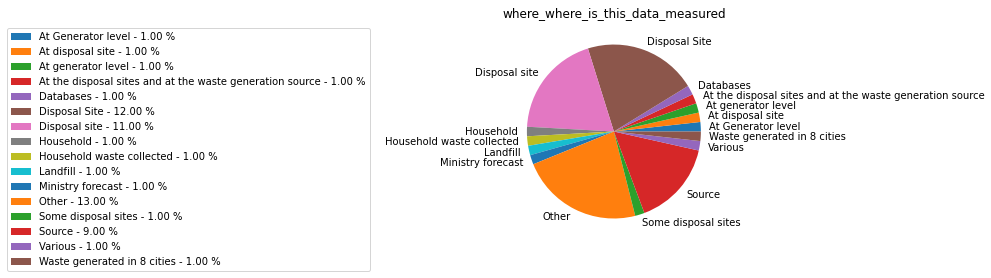

In [44]:
# make a pie chart for all data (where_where_is_this_data_measured)
plt.pie(value_counts['where_where_is_this_data_measured'].values, labels=value_counts['where_where_is_this_data_measured'].index)
plt.title('where_where_is_this_data_measured')

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(value_counts['where_where_is_this_data_measured'].index, value_counts['where_where_is_this_data_measured'].values)]
plt.legend(labels, bbox_to_anchor=(-0.6, 1))

This variable stores information on where total municipal solid waste data was collected from. As a result, it may have more than 2 possible values. However, we can see that some values (e.g., "Disposal site", "Disposal Site", "At disposal site") are really equivalent. These values ought to be converted to the same exact response:

In [145]:
# replace certain responses for consistency (where_where_is_this_data_measured)
cat_var_clean = df['where_where_is_this_data_measured'].replace(['At Generator level', 'Disposal Site', 'Disposal site', 'Some disposal sites', 'Household waste collected'], ['At generator level', 'At disposal site', 'At disposal site', 'At disposal site', 'Household'])

df_clean['where_where_is_this_data_measured'] = cat_var_clean
df_clean

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN,0.854100
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,0.162411
2,AGO,SSF,Angola,LMC,8036.690430,51.800000,6.700000,4.400000,11.500000,11.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167900
3,ALB,ECS,Albania,UMC,13724.058594,51.400000,4.500000,4.800000,15.210000,9.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,At disposal site,0.381000
4,AND,ECS,Andorra,HIC,43711.800781,31.200000,8.200000,2.600000,11.600000,35.100000,...,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN,0.521648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,ECS,Kosovo,LMC,9723.561523,42.000000,6.000000,6.000000,20.000000,8.000000,...,NaN,NaN,33.57,NaN,NaN,NaN,NaN,NaN,NaN,0.177045
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,...,NaN,NaN,25.00,NaN,8.0,NaN,47.0,8.0,Other,0.175347
214,ZAF,SSF,South Africa,UMC,12666.607422,16.381655,5.200216,16.910461,45.020646,9.396918,...,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,0.356804
215,ZMB,SSF,Zambia,LMC,3201.289307,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182847


In [146]:
# verify
("At Generator level" or "Disposal Site" or "Disposal site") in df_clean['where_where_is_this_data_measured'].values

False

With the original categorical data scrubbed (intentionally equivalent values made literally equivalent), we can now visualize updated charts of each categorical variable's values:

In [147]:
# get cleaned categorical data
df_cat_clean = pd.concat([df_clean.loc[:, 'region_id':'income_id'], df_clean.loc[:, 'other_information_information_system_for_solid_waste_management':'other_information_summary_of_key_solid_waste_information_made_available_to_the_public'], df.loc[:, ['where_where_is_this_data_measured']]])
df_cat_clean

,region_id,country_name,income_id,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,where_where_is_this_data_measured
0,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN
1,SAS,Afghanistan,LIC,NaN,NaN,NaN,NaN,NaN,NaN
2,SSF,Angola,LMC,NaN,NaN,NaN,NaN,NaN,NaN
3,ECS,Albania,UMC,NaN,NaN,NaN,NaN,NaN,NaN
4,ECS,Andorra,HIC,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# get counts of each kind of categorical variable value
value_counts_clean = df_cat_clean.apply(lambda x: x.value_counts(), axis=0).T.stack() # can supply "normalize=True" to value_counts to get percentages rather than counts
value_counts_clean

region_id                          EAS                            37.0
                                   ECS                            58.0
                                   LCN                            42.0
                                   MEA                            21.0
                                   NAC                             3.0
                                                                  ... 
where_where_is_this_data_measured  Ministry forecast               1.0
                                   Other                          13.0
                                   Source                          9.0
                                   Various                         1.0
                                   Waste generated in 8 cities     1.0
Length: 251, dtype: float64

Text(0.5, 1.0, 'other_information_national_law_governing_solid_waste_management_in_the_country')

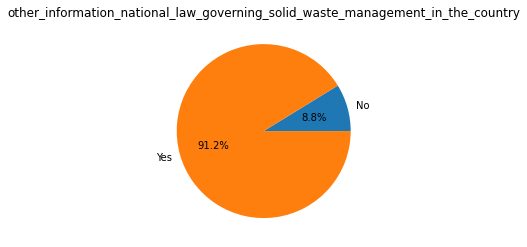

In [149]:
# make a pie chart for all data (other_information_national_law_governing_solid_waste_management_in_the_country)
plt.pie(value_counts_clean['other_information_national_law_governing_solid_waste_management_in_the_country'].values, labels=value_counts_clean['other_information_national_law_governing_solid_waste_management_in_the_country'].index, autopct='%1.1f%%')
plt.title('other_information_national_law_governing_solid_waste_management_in_the_country')

Text(0.5, 1.0, 'other_information_summary_of_key_solid_waste_information_made_available_to_the_public')

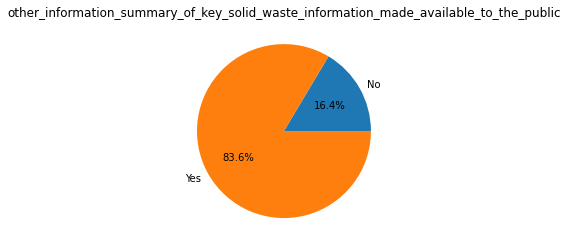

In [150]:
# make a pie chart for all data (other_information_summary_of_key_solid_waste_information_made_available_to_the_public)
plt.pie(value_counts_clean['other_information_summary_of_key_solid_waste_information_made_available_to_the_public'].values, labels=value_counts_clean['other_information_summary_of_key_solid_waste_information_made_available_to_the_public'].index, autopct='%1.1f%%')
plt.title('other_information_summary_of_key_solid_waste_information_made_available_to_the_public')

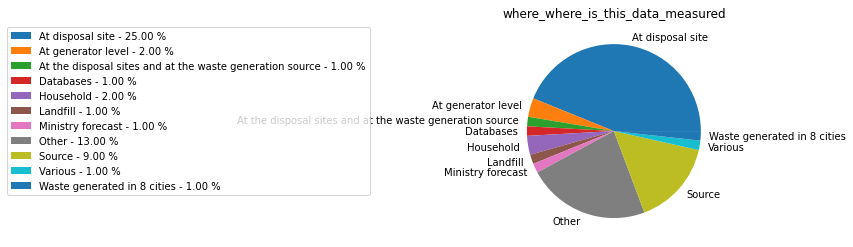

In [151]:
# make a pie chart for all data (where_where_is_this_data_measured)
plt.pie(value_counts_clean['where_where_is_this_data_measured'].values, labels=value_counts_clean['where_where_is_this_data_measured'].index)
plt.title('where_where_is_this_data_measured')

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(value_counts_clean['where_where_is_this_data_measured'].index, value_counts_clean['where_where_is_this_data_measured'].values)]
plt.legend(labels, bbox_to_anchor=(-0.6, 1))

<a id='section_3'></a>
## 3. Analyzing the Data
In this section of my EDA report, I refer back to the guiding questions that I had with respect to the data. As was already stated, there are numerous questions that may have been possibly posed or potential insights that may have been methodically uncovered with respect to the data. My set of guiding questions serve the purpose of narrowing the foci of my overall analysis and reflect some of the questions that I was most interested in answering or investigating. Given these guiding questions, this section has been organized into sub-sections, each sub-section corresponding to a specific set of guiding questions. These sub-sections are as follows:

<a id='section_3a'></a>
### a. Top (and Bottom) Waste-generating Countries:
#### i. In Total:
My first question regarding this topic was: "Which countries generate the most total municipal solid waste?"

Identifying those was simple enough:

In [47]:
df_top_15_total_msw = df.sort_values(by='total_msw_total_msw_generated_tons_year', ascending=False).head(15)
df_top_15_total_msw[['country_name', 'total_msw_total_msw_generated_tons_year']]

,country_name,total_msw_total_msw_generated_tons_year
36,China,3.950814e+08
203,United States,2.652245e+08
89,India,1.897500e+08
26,Brazil,7.906958e+07
87,Indonesia,6.520000e+07
164,Russian Federation,6.000000e+07
125,Mexico,5.310000e+07
50,Germany,5.062788e+07
98,Japan,4.272000e+07
64,France,3.674882e+07


As you can see, the data show that China generates the most solid waste (roughly 400 million tons/year). It is followed by the United States (roughly 300 million tons/year), which is closely followed by India (roughly 200 million tons/year).

The bar chart below compares the above countries' solid waste generation figures:

Text(0, 0.5, 'Total Solid Waste-generating Rate')

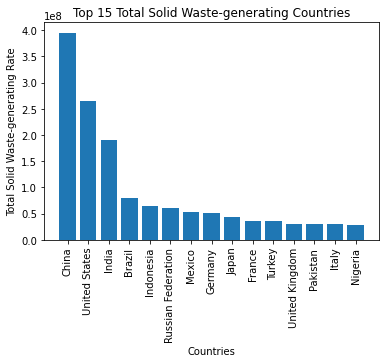

In [48]:
plt.bar(df_top_15_total_msw['country_name'], df_top_15_total_msw['total_msw_total_msw_generated_tons_year'])

plt.title('Top 15 Total Solid Waste-generating Countries')
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Total Solid Waste-generating Rate')

I think that it's important to note that the above list was generated with outlier data. I was curious to find out which countries would make the list excluding outlier data. In other words, which countries lead the pack when the pack has been trimmed down to its middle bulk?

To that end, I reused a data set created earlier:

In [49]:
df_total_msw_outliers_r_top_15_total_msw = df_total_msw_outliers_r.sort_values(by='total_msw_total_msw_generated_tons_year', ascending=False).head(15)[['country_name', 'total_msw_total_msw_generated_tons_year']]
df_total_msw_outliers_r_top_15_total_msw

,country_name,total_msw_total_msw_generated_tons_year
156,Poland,1.275821e+07
55,Algeria,1.237874e+07
41,Colombia,1.215012e+07
206,"Venezuela, RB",9.779093e+06
209,Vietnam,9.570300e+06
199,Tanzania,9.276995e+06
144,Netherlands,8.805088e+06
152,Peru,8.356711e+06
200,Uganda,7.045050e+06
120,Morocco,6.852000e+06


In this list, Poland sits at the top with roughly 12.6 million tons of municipal solid waste generated per year. It's closely followed by Algeria, which generates 12.4 million tons of municipal solid waste per year. Colombia follows with 1.22 million tons of municipal solid waste generated per year. From these data we can see that the difference between the numbers for these countries are an order of magnitude smaller than the numbers for the countries leading the pack in the previous list.

**Note:** A country with a null value for its country name variable (country_name) had been excluded from the outliers-removed total solid waste data (df_total_msw_outliers_r). If that exclusion had not been made, then that unknown country would've made 9th place.

The bar chart below visually displays the above data:

Text(0, 0.5, 'Total Solid Waste-generating Rate')

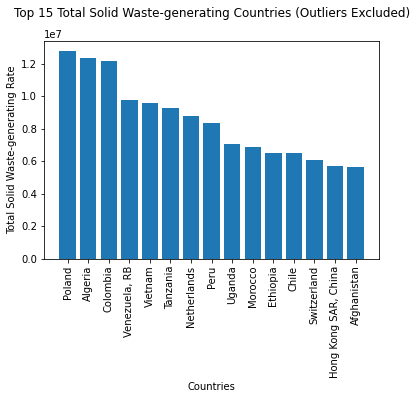

In [50]:
plt.bar(df_total_msw_outliers_r_top_15_total_msw['country_name'], df_total_msw_outliers_r_top_15_total_msw['total_msw_total_msw_generated_tons_year'])

plt.title('Top 15 Total Solid Waste-generating Countries (Outliers Excluded)', y=1.0825)
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Total Solid Waste-generating Rate')

Beyond identifying the top municipal solid waste-generating countries (outliers included and outliers excluded), I had wanted to identify the bottom municipal solid waste-generating countries. Given that the outlier values of the total municipal solid waste generation rate variable are all above the upper boundary value that we had defined, it's not necessary to also investigate the outliers-removed data for the bottom municipal solid waste-generating countries (since we know that they are not outliers):

In [51]:
df_bottom_15_total_msw = df.sort_values(by='total_msw_total_msw_generated_tons_year', ascending=True).head(15)[['country_name', 'total_msw_total_msw_generated_tons_year']]
df_bottom_15_total_msw

,country_name,total_msw_total_msw_generated_tons_year
197,Tuvalu,3989.48650
147,Nauru,6191.75050
126,Marshall Islands,8614.00000
154,Palau,9426.74550
52,Dominica,13176.00000
119,St. Martin (French part),15479.50000
71,Gibraltar,16954.00000
173,San Marino,17174.68000
193,Tonga,17238.20175
8,American Samoa,18989.49000


Text(0, 0.5, 'Total Solid Waste-generating Rate')

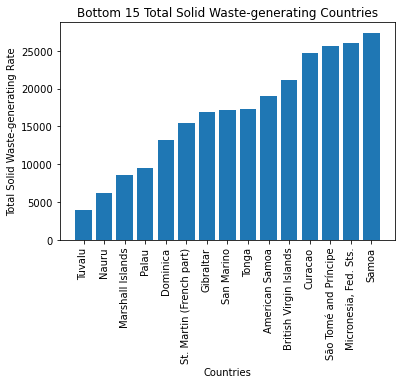

In [52]:
plt.bar(df_bottom_15_total_msw['country_name'], df_bottom_15_total_msw['total_msw_total_msw_generated_tons_year'])

plt.title('Bottom 15 Total Solid Waste-generating Countries')
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Total Solid Waste-generating Rate')

Regardless of whether outliers were included or not, the country of Tuvalu sat at the bottom of the both lists with roughly 4000 tons of municipal solid waste generated per year. From these data we are able to observe that there is a wide range between the total municipal solid waste generation rates of countries. Tuvalu's total municipal solid waste generation rate is multiple orders of magnitude smaller than countries with top municipal solid waste generation rates (outliers included or excluded).
#### i. Per Capita:
While investigating total municipal solid waste enabled us to identify the top and the bottom total municipal solid waste-generating countries, it revealed only one side of the story. I wanted to know which countries would be the top and the bottom per _person_, or per capita, municipal solid waste-generating countries. After all, total municipal solid waste generation rate may very well be a direct function of population. Or, it positively correlates with population (i.e., the higher the population, the higher the total municipal solid waste generation rate).

In the previous investigation of outliers, I had tacked on a column to the main data frame for the per capita municipal solid waste generation rates of each country. I used this data for the below investigations:

In [53]:
df_top_15_per_capita_msw = df.sort_values(by='per_capita_msw', ascending=False).head(15)
df_top_15_per_capita_msw[['country_name', 'per_capita_msw']]

,country_name,per_capita_msw
208,Virgin Islands (U.S.),1.384898
24,Bermuda,1.265471
65,Faeroe Islands,1.248925
121,Monaco,1.217479
157,Puerto Rico,1.200903
122,Moldova,1.120169
34,Channel Islands,1.087468
207,British Virgin Islands,1.022000
47,Cayman Islands,1.013993
132,Mongolia,0.957918


Text(0, 0.5, 'Per Capita Solid Waste-generating Rate')

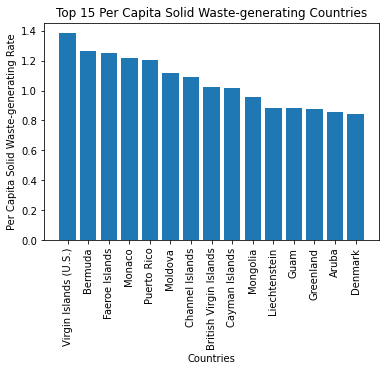

In [54]:
plt.bar(df_top_15_per_capita_msw['country_name'], df_top_15_per_capita_msw['per_capita_msw'])

plt.title('Top 15 Per Capita Solid Waste-generating Countries')
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Per Capita Solid Waste-generating Rate')

Since we've created a new variable (per_capita_msw), it's important to check for what outliers the values for this variable may have and determine what effects the presence of those outliers may have on our analyses. In my previous investigation on outliers, I identified the outliers in terms of the per capita municipal solid waste variable.

Below, I investigate how the above bar charts might change with the per capita municipal solid waste variable outliers removed:

In [55]:
df_per_capita_outliers_r_top_15_per_capita_msw = df_per_capita_msw_outliers_r.sort_values(by='per_capita_msw', ascending=False).head(15)[['country_name', 'per_capita_msw']]
df_per_capita_outliers_r_top_15_per_capita_msw

,country_name,per_capita_msw
132,Mongolia,0.957918
112,Liechtenstein,0.886086
80,Guam,0.884524
78,Greenland,0.878657
0,Aruba,0.854100
53,Denmark,0.844000
203,United States,0.811860
116,Luxembourg,0.791000
82,"Hong Kong SAR, China",0.777450
145,Norway,0.776000


Text(0, 0.5, 'Per Capita Solid Waste-generating Rate')

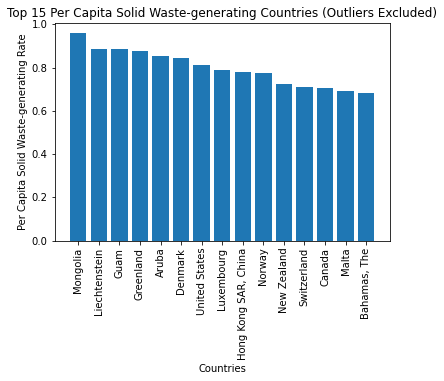

In [56]:
plt.bar(df_per_capita_outliers_r_top_15_per_capita_msw['country_name'], df_per_capita_outliers_r_top_15_per_capita_msw['per_capita_msw'])

plt.title('Top 15 Per Capita Solid Waste-generating Countries (Outliers Excluded)')
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Per Capita Solid Waste-generating Rate')

We need not investigate what the bottom per capita municipal solid waste-generating countries are for the outliers-removed data as they will be the same as the ones identified from the outliers-included data (due to the fact that all of the identified outliers were on the higher extreme side of the data).

In [57]:
df_bottom_15_per_capita_msw = df.sort_values(by='per_capita_msw', ascending=True).head(15)[['country_name', 'per_capita_msw']]
df_bottom_15_per_capita_msw

,country_name,per_capita_msw
114,Lesotho,0.037370
192,Timor-Leste,0.050348
107,Lao PDR,0.052806
146,Nepal,0.061035
61,Ethiopia,0.065411
102,Cambodia,0.071313
167,Sudan,0.073259
72,Guinea,0.073398
137,Malawi,0.078291
134,Mozambique,0.091870


Text(0, 0.5, 'Per Capita Solid Waste-generating Rate')

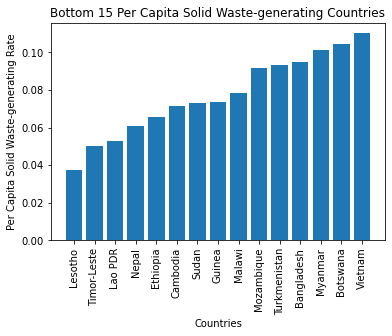

In [58]:
plt.bar(df_bottom_15_per_capita_msw['country_name'], df_bottom_15_per_capita_msw['per_capita_msw'])

plt.title('Bottom 15 Per Capita Solid Waste-generating Countries')
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
plt.ylabel('Per Capita Solid Waste-generating Rate')

As we can see from the data visualized above, the top 15 total municipal solid waste-generating countries are not the same as the top 15 per capita municipal solid waste-generating countries (outliers included). In other words, while some countries generate much more municipal solid waste in total (due to larger populations perhaps), other countries generate much more municipal solid waste per person (on average).

Below, I try to find out how much more:

<AxesSubplot:>

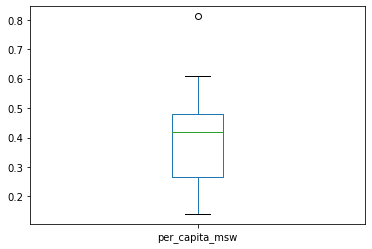

In [59]:
# examine the distribution of the data in terms of quantiles (df_top_15_total_msw: per_capita_msw)
df_top_15_total_msw['per_capita_msw'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

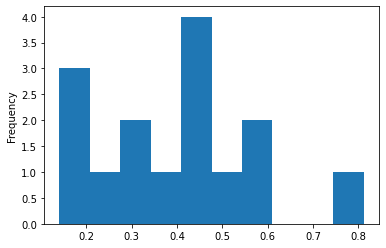

In [60]:
# examine the distribution of the data in terms of frequency (df_top_15_total_msw: per_capita_msw)
df_top_15_total_msw['per_capita_msw'].plot.hist()

<AxesSubplot:>

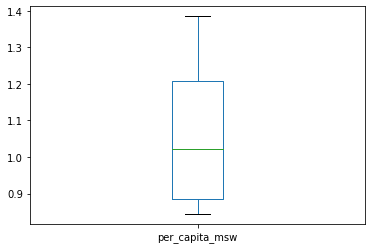

In [61]:
# examine the distribution of the data in terms of quantiles (df_top_15_per_capita_msw: per_capita_msw)
df_top_15_per_capita_msw['per_capita_msw'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

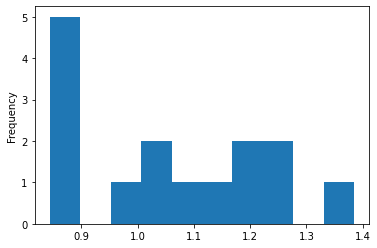

In [62]:
# examine the distribution of the data in terms of frequency (df_top_15_per_capita_msw: per_capita_msw)
df_top_15_per_capita_msw['per_capita_msw'].plot.hist()

As we can see, our sample data distributions are both a bit skewed right. Thus, I used their respective medians (instead of means) for comparison:

In [63]:
df_top_15_total_msw_median_per_capita_msw = df_top_15_total_msw[['per_capita_msw']].median().values[0]
print('df_top_15_total_msw median per_capita_msw: ' + str(df_top_15_total_msw_median_per_capita_msw))
df_top_15_per_capita_msw_median_per_capita_msw = df_top_15_per_capita_msw[['per_capita_msw']].median().values[0]
print('df_top_15_per_capita_msw median per_capita_msw: ' + str(df_top_15_per_capita_msw_median_per_capita_msw))
diff = df_top_15_per_capita_msw_median_per_capita_msw - df_top_15_total_msw_median_per_capita_msw
print('Difference in per_capita_msw: ' + str(diff))

df_top_15_total_msw median per_capita_msw: 0.41898949788857226
df_top_15_per_capita_msw median per_capita_msw: 1.022
Difference in per_capita_msw: 0.6030105021114278


The top per capita municipal solid waste-generating countries generate about 0.60 tons of municipal solid waste per year per capita more than the top total municipal solid waste-generating countries.

<a id='section_3b'></a>
### b. The Composition of Our Solid Waste:
A second area of interest I had was in the composition of the solid waste that we're generating.

Below, are my investigations into this topic:

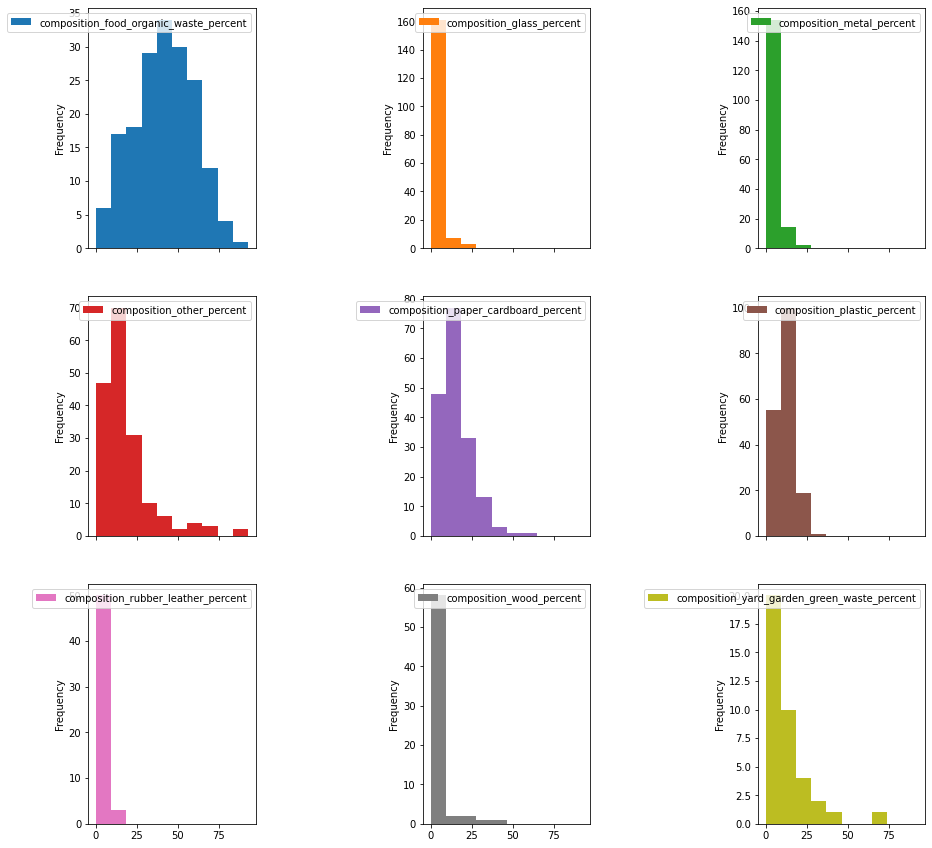

In [64]:
# plot the data distributions
df_crude_waste_composition_percentages.plot(kind="hist", subplots=True, sharey=False, layout=(3,3), figsize=(15,15))
plt.subplots_adjust(wspace=1)

As we can see, the data are generally not Normal. Thus, I decided to use their respective medians for constructing a single pie chart to approximate global waste composition averages:

In [65]:
# compute global waste composition averages
df_waste_comp = df.loc[:,'composition_food_organic_waste_percent':'composition_yard_garden_green_waste_percent']
global_waste_comp_avgs = df_waste_comp.median()
global_waste_comp_avgs

composition_food_organic_waste_percent         43.200000
composition_glass_percent                       4.000000
composition_metal_percent                       3.000000
composition_other_percent                      14.000000
composition_paper_cardboard_percent            13.155000
composition_plastic_percent                    11.500000
composition_rubber_leather_percent              1.500000
composition_wood_percent                        2.440000
composition_yard_garden_green_waste_percent     6.318844
dtype: float64

Text(0.5, 1.0, 'Global Waste Composition Averages')

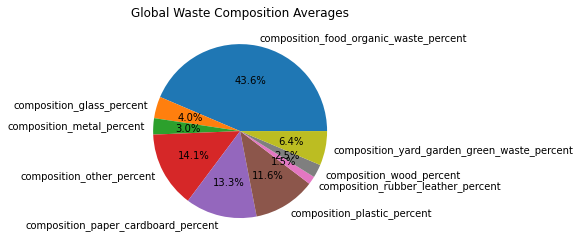

In [66]:
# make a pie chart of the global waste composition averages
plt.pie(global_waste_comp_avgs.values, labels=global_waste_comp_avgs.index, autopct='%1.1f%%')

plt.title('Global Waste Composition Averages')

According to the data, a majority of global municipal solid waste comes from organic and/or food waste. The next few types make up comparable sections of the pie; they are an unspecified "other" kind of waste, paper/cardboard waste, and plastic waste.

While this pie chart provides us a general sense of what the world's waste looks like, it would probably be a mistake to try to apply this pie chart to every country regardless of their other characteristics. As a result, I was curious to know how this pie chart would change if supplied with the data of only countries of a certain income class. In this data set, there are 4 income classes: high income (HIC), upper middle income (UMC), lower middle income (LMC), and low income (LIC).

When separated into income class buckets, waste composition averages become:

In [67]:
# compute high income countries' waste composition averages
df_waste_comp_HIC = df.loc[df['income_id']=='HIC','composition_food_organic_waste_percent':'composition_yard_garden_green_waste_percent']
HIC_waste_comp_avgs = df_waste_comp_HIC.median()
HIC_waste_comp_avgs

composition_food_organic_waste_percent         34.400
composition_glass_percent                       5.000
composition_metal_percent                       3.900
composition_other_percent                      14.000
composition_paper_cardboard_percent            19.850
composition_plastic_percent                    12.265
composition_rubber_leather_percent              1.960
composition_wood_percent                        2.385
composition_yard_garden_green_waste_percent     5.920
dtype: float64

Text(0.5, 1.0, "High Income Countries' Waste Composition Averages")

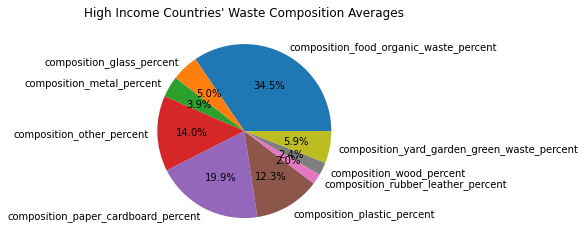

In [68]:
# make a pie chart of high income countries' waste composition averages
plt.pie(HIC_waste_comp_avgs.values, labels=HIC_waste_comp_avgs.index, autopct='%1.1f%%')

plt.title('High Income Countries\' Waste Composition Averages')

In [69]:
# compute upper middle income countries' waste composition averages
df_waste_comp_UMC = df.loc[df['income_id']=='UMC','composition_food_organic_waste_percent':'composition_yard_garden_green_waste_percent']
UMC_waste_comp_avgs = df_waste_comp_UMC.median()
UMC_waste_comp_avgs

composition_food_organic_waste_percent         49.80
composition_glass_percent                       4.10
composition_metal_percent                       2.90
composition_other_percent                      13.73
composition_paper_cardboard_percent            11.17
composition_plastic_percent                    12.33
composition_rubber_leather_percent              1.73
composition_wood_percent                        2.00
composition_yard_garden_green_waste_percent    12.14
dtype: float64

Text(0.5, 1.0, "Upper Middle Income Countries' Waste Composition Averages")

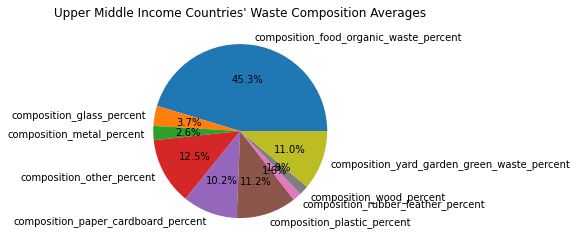

In [70]:
# make a pie chart of upper middle income countries' waste composition averages
plt.pie(UMC_waste_comp_avgs.values, labels=UMC_waste_comp_avgs.index, autopct='%1.1f%%')

plt.title('Upper Middle Income Countries\' Waste Composition Averages')

In [71]:
# compute lower middle income countries' waste composition averages
df_waste_comp_LMC = df.loc[df['income_id']=='LMC','composition_food_organic_waste_percent':'composition_yard_garden_green_waste_percent']
LMC_waste_comp_avgs = df_waste_comp_LMC.median()
LMC_waste_comp_avgs

composition_food_organic_waste_percent         54.40
composition_glass_percent                       3.10
composition_metal_percent                       2.85
composition_other_percent                      12.90
composition_paper_cardboard_percent            10.00
composition_plastic_percent                    10.55
composition_rubber_leather_percent              1.35
composition_wood_percent                        5.80
composition_yard_garden_green_waste_percent     1.20
dtype: float64

Text(0.5, 1.0, "Lower Middle Income Countries' Waste Composition Averages")

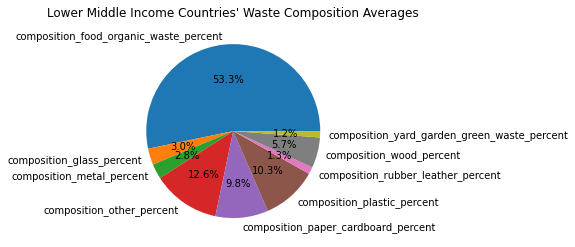

In [72]:
# make a pie chart of lower middle income countries' waste composition averages
plt.pie(LMC_waste_comp_avgs.values, labels=LMC_waste_comp_avgs.index, autopct='%1.1f%%')

plt.title('Lower Middle Income Countries\' Waste Composition Averages')

In [73]:
# compute low income countries' waste composition averages
df_waste_comp_LIC = df.loc[df['income_id']=='LIC','composition_food_organic_waste_percent':'composition_yard_garden_green_waste_percent']
LIC_waste_comp_avgs = df_waste_comp_LIC.median()
LIC_waste_comp_avgs

composition_food_organic_waste_percent         52.39
composition_glass_percent                       1.60
composition_metal_percent                       2.05
composition_other_percent                      22.00
composition_paper_cardboard_percent             7.00
composition_plastic_percent                     7.30
composition_rubber_leather_percent              0.95
composition_wood_percent                        2.00
composition_yard_garden_green_waste_percent     5.50
dtype: float64

Text(0.5, 1.0, "Low Income Countries' Waste Composition Averages")

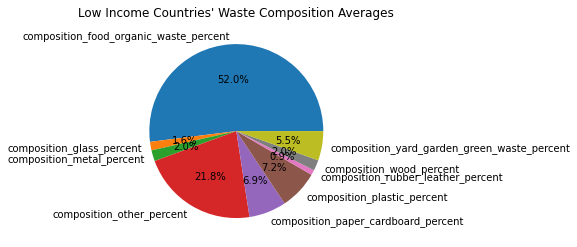

In [74]:
# make a pie chart of the high income countries' waste composition averages
plt.pie(LIC_waste_comp_avgs.values, labels=LIC_waste_comp_avgs.index, autopct='%1.1f%%')

plt.title('Low Income Countries\' Waste Composition Averages')

One of the more notable things that we can observe from the different pie charts above is that the portion of the pie dedicated to organic and/or food waste grows larger as we go from looking at high income countries's data to low income countries' data. Or, put another way, the portion of the pie dedicated to organic and/or food waste gets smaller as we go from looking at low income countries' data to high income countries' data. An initial thought that comes to mind as to why this may be is that individuals living in high income countries are more likely to have effective food storage options than those living in low income countries.

<a id='section_3c'></a>
### c. On "Special" Wastes:
According to the report accompanying the given data set, "municipal solid waste is one of several waste streams that countries and cities manage." (p. 36) This means that there are other waste streams that countries and cities manage. Data belonging to the "special" waste columns of the table correspond to these other waste streams, which include agricultural, construction and demolition, electronic, hazardous, industrial, and medical waste.

Below, I uncover how much of each kind of special waste is being generated:

special_waste_agricultural_waste_tons_year                      AxesSubplot(0.125,0.657941;0.352273x0.222059)
special_waste_construction_and_demolition_waste_tons_year    AxesSubplot(0.547727,0.657941;0.352273x0.222059)
special_waste_e_waste_tons_year                                 AxesSubplot(0.125,0.391471;0.352273x0.222059)
special_waste_hazardous_waste_tons_year                      AxesSubplot(0.547727,0.391471;0.352273x0.222059)
special_waste_industrial_waste_tons_year                           AxesSubplot(0.125,0.125;0.352273x0.222059)
special_waste_medical_waste_tons_year                           AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

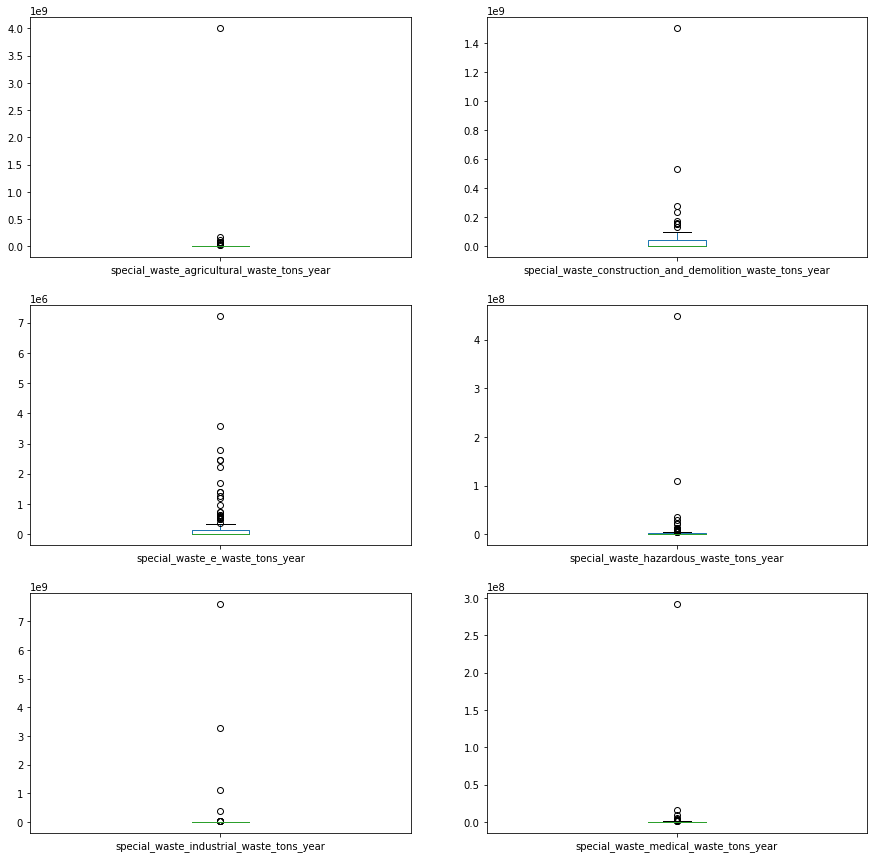

In [83]:
# get special waste data
df_special_waste = df.loc[:, 'special_waste_agricultural_waste_tons_year':'special_waste_medical_waste_tons_year']

# visualize the distributions of the data (box plots)
df_special_waste.plot(kind='box', subplots=True, sharey=False, layout=(3,2), figsize=(15,15))

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

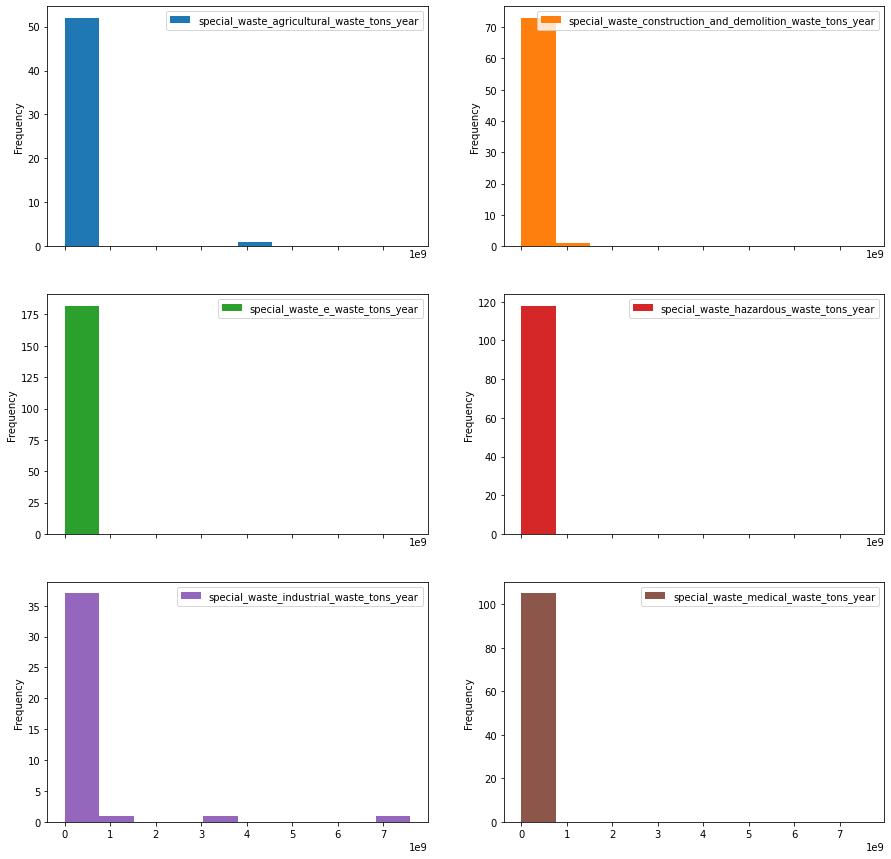

In [84]:
# visualize the distributions of the data (histograms)
df_special_waste.plot(kind='hist', subplots=True, sharey=False, layout=(3,2), figsize=(15,15))

As we can see, the amounts of each kind of special waste generated mostly fall below 1 million tons per year. The box plots show that there are quite a few outliers for each of the special waste variables. Given the presence of these outliers, it would be best to use the median as the estimate of location for each of the special waste variables:

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

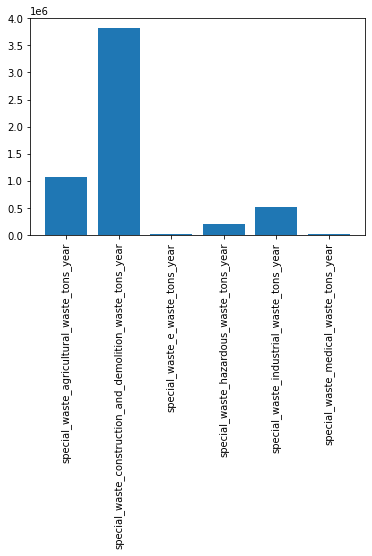

In [87]:
med_agr_waste = df_special_waste['special_waste_agricultural_waste_tons_year'].median()
med_cons_waste = df_special_waste['special_waste_construction_and_demolition_waste_tons_year'].median()
med_e_waste = df_special_waste['special_waste_e_waste_tons_year'].median()
med_haz_waste = df_special_waste['special_waste_hazardous_waste_tons_year'].median()
med_ind_waste = df_special_waste['special_waste_industrial_waste_tons_year'].median()
med_medical_waste = df_special_waste['special_waste_medical_waste_tons_year'].median()

special_waste_meds = [med_agr_waste, med_cons_waste, med_e_waste, med_haz_waste, med_ind_waste, med_medical_waste]

plt.bar(df_special_waste.columns, special_waste_meds)

plt.xticks(rotation='vertical')

It appears that most of the world's special waste comes from the construction and demolition waste stream. The median amount of waste generated for this kind of waste is roughly 400 thousand tons per year. Following at a distance is the median amount of agricultural waste generated per year.

Below, I find out what the totals of each kind of special waste are:

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

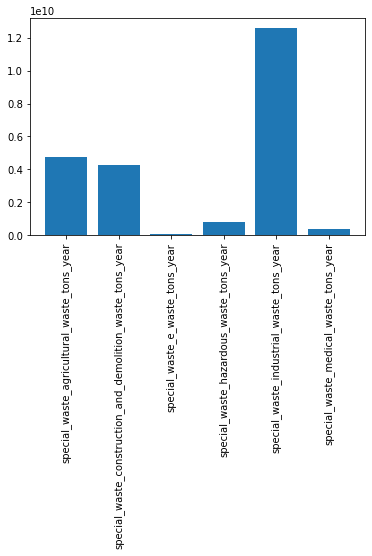

In [88]:
total_agr_waste = df_special_waste['special_waste_agricultural_waste_tons_year'].sum()
total_cons_waste = df_special_waste['special_waste_construction_and_demolition_waste_tons_year'].sum()
total_e_waste = df_special_waste['special_waste_e_waste_tons_year'].sum()
total_haz_waste = df_special_waste['special_waste_hazardous_waste_tons_year'].sum()
total_ind_waste = df_special_waste['special_waste_industrial_waste_tons_year'].sum()
total_medical_waste = df_special_waste['special_waste_medical_waste_tons_year'].sum()

special_waste_totals = [total_agr_waste, total_cons_waste, total_e_waste, total_haz_waste, total_ind_waste, total_medical_waste]

plt.bar(df_special_waste.columns, special_waste_totals)

plt.xticks(rotation='vertical')

Here, we can see that in terms of a simple total, industrial waste dominates. While the median value of industrial waste may not be as high, there are certain countries for which the amount of industrial waste that they generate is quite high, which get factored into the sum totals.

<a id='section_3d'></a>
### d. Possible Factors of Total Municipal Solid Waste:
Given the variables in the data set, I was interested in which variables might have a positive correlative relationship with total municipal solid waste. It's important to keep in mind that "correlation does not equal causation," but it's still interesting to ponder whether positively correlated variables have a causal relationship to the variable of interest and, if so, to what degree that variable takes part in determining a value for that variable.

Below, I examine correlations:

<AxesSubplot:>

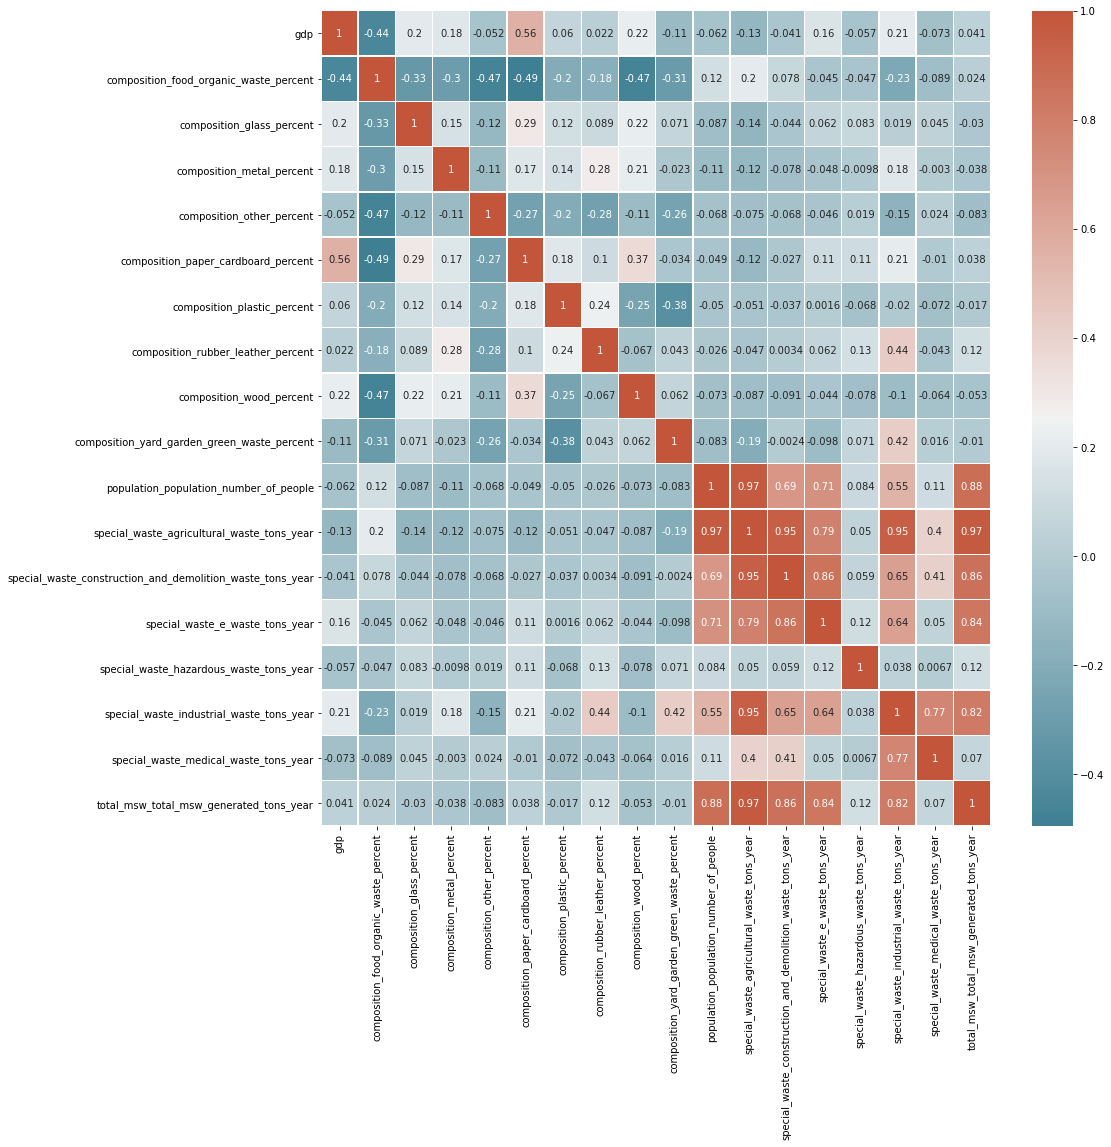

In [74]:
# get numeric data
df_num_vars = pd.concat([df.loc[:,'gdp':'composition_yard_garden_green_waste_percent'], df.loc[:, 'population_population_number_of_people':'total_msw_total_msw_generated_tons_year']], 1)

corr_matrix = df_num_vars.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, xticklabels=df_num_vars.columns, yticklabels=df_num_vars.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), linewidths=0.5, ax=ax)

**Note:** This section is under development!

<a id='section_3e'></a>
### e. How We're "Trashing" Our Trash:
In this section, I explore the methods of waste disposal and their respective popularities:

In [121]:
anaerobic_digestion_countries = df[df['waste_treatment_anaerobic_digestion_percent'].notnull()]
anaerobic_digestion_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
91,IRN,MEA,"Iran, Islamic Rep.",UMC,14535.862305,72.9,1.9,2.3,5.0,7.3,...,0.4,NaN,72.0,NaN,5.0,NaN,0.3,NaN,Source,0.22279
98,JPN,EAS,Japan,HIC,41309.957031,36.0,5.0,4.0,6.0,33.0,...,80.2,NaN,NaN,13.3,4.9,NaN,NaN,NaN,Source,0.33763


In [122]:
compost_countries = df[df['waste_treatment_compost_percent'].notnull()]
compost_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
5,ARE,MEA,United Arab Emirates,HIC,67119.132812,39.00,4.00,3.00,10.00,25.00,...,NaN,9.00,62.0,NaN,20.000,NaN,NaN,NaN,NaN,0.574962
9,ATG,LCN,Antigua and Barbuda,HIC,17965.501953,46.00,7.00,7.00,12.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.14,0.1,Disposal Site,0.316036
11,AUT,ECS,Austria,HIC,56029.613281,31.40,7.00,4.40,18.50,19.70,...,37.90,2.98,NaN,NaN,25.660,NaN,2.22,NaN,NaN,0.588000
14,BEL,ECS,Belgium,HIC,51914.914062,14.18,3.10,1.91,40.14,18.38,...,43.39,0.91,NaN,NaN,34.303,NaN,2.26,NaN,NaN,0.415000
17,BGD,SAS,Bangladesh,LMC,3195.737061,80.58,0.44,0.50,8.59,3.04,...,NaN,NaN,NaN,NaN,NaN,NaN,94.75,NaN,Source,0.094900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,TTO,LCN,Trinidad and Tobago,HIC,28910.908203,27.15,10.15,3.74,17.19,22.60,...,NaN,NaN,84.0,NaN,NaN,NaN,3.20,NaN,Disposal Site,0.548057
195,TUN,MEA,Tunisia,LMC,10505.262695,68.00,2.00,4.00,5.00,10.00,...,NaN,70.00,21.0,NaN,4.000,NaN,NaN,NaN,Disposal site,0.242285
196,TUR,ECS,Turkey,UMC,28289.087891,64.00,2.00,1.00,24.00,6.00,...,NaN,NaN,44.0,NaN,NaN,54.0,1.00,NaN,NaN,0.424000
205,VCT,LCN,St. Vincent and the Grenadines,UMC,11971.993164,49.60,5.60,3.80,10.50,22.10,...,NaN,99.91,NaN,3.6,NaN,NaN,NaN,NaN,NaN,0.288350


In [123]:
controlled_landfill_countries = df[df['waste_treatment_controlled_landfill_percent'].notnull()]
controlled_landfill_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
6,ARG,LCN,Argentina,HIC,23550.099609,38.740000,3.160000,1.840000,15.360000,13.960000,...,NaN,NaN,22.60000,NaN,6.000000,62.50000,NaN,NaN,Other,0.416704
9,ATG,LCN,Antigua and Barbuda,HIC,17965.501953,46.000000,7.000000,7.000000,12.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.14000,0.1,Disposal Site,0.316036
21,BIH,ECS,Bosnia and Herzegovina,UMC,12671.007812,NaN,NaN,NaN,92.700000,4.900000,...,NaN,NaN,41.75000,0.025,0.000970,24.12000,25.55403,NaN,Other,0.353148
22,BLR,ECS,Belarus,UMC,18307.519531,30.000000,8.000000,2.000000,35.000000,5.000000,...,NaN,NaN,7.10000,NaN,16.000000,NaN,NaN,NaN,At the disposal sites and at the waste generat...,0.451019
24,BMU,NAC,Bermuda,HIC,80982.367188,17.000000,9.000000,6.000000,26.000000,29.000000,...,67.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1.265471
25,BOL,LCN,Bolivia,LMC,7984.413574,55.196911,2.903475,2.501931,22.702703,6.501931,...,NaN,NaN,55.52000,NaN,12.110000,31.93000,NaN,NaN,Source,0.206910
26,BRA,LCN,Brazil,UMC,14596.246094,51.400000,2.400000,2.900000,16.700000,13.100000,...,NaN,NaN,15.61932,NaN,1.400000,53.30547,7.59000,NaN,NaN,0.379240
27,BRB,LCN,Barbados,HIC,15444.746094,18.300000,3.700000,4.900000,5.700000,19.700000,...,NaN,NaN,NaN,NaN,9.000000,NaN,1.00000,NaN,Disposal Site,0.623004
29,BTN,SAS,Bhutan,LMC,6743.016113,58.000000,4.000000,1.000000,7.000000,17.000000,...,NaN,NaN,NaN,NaN,0.860000,NaN,NaN,NaN,Source,0.162039
34,CHI,ECS,Channel Islands,HIC,46672.593750,NaN,NaN,NaN,NaN,NaN,...,16.441908,NaN,NaN,NaN,28.430202,NaN,NaN,NaN,NaN,1.087468


In [124]:
incineration_countries = df[df['waste_treatment_incineration_percent'].notnull()]
incineration_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
4,AND,ECS,Andorra,HIC,43711.800781,31.20,8.20,2.60,11.60,35.10,...,52.100000,NaN,NaN,NaN,NaN,NaN,47.900,NaN,NaN,0.521648
10,AUS,EAS,Australia,HIC,47784.179688,48.44,3.81,19.38,3.46,17.30,...,9.770000,48.870,NaN,NaN,42.100000,NaN,NaN,NaN,NaN,0.560966
11,AUT,ECS,Austria,HIC,56029.613281,31.40,7.00,4.40,18.50,19.70,...,37.900000,2.980,NaN,NaN,25.660000,NaN,2.220,NaN,NaN,0.588000
14,BEL,ECS,Belgium,HIC,51914.914062,14.18,3.10,1.91,40.14,18.38,...,43.390000,0.910,NaN,NaN,34.303000,NaN,2.260,NaN,NaN,0.415000
18,BGR,ECS,Bulgaria,UMC,22279.361328,24.35,5.83,1.98,17.93,14.18,...,2.750000,66.220,NaN,NaN,19.030000,NaN,1.680,NaN,Other,0.407000
24,BMU,NAC,Bermuda,HIC,80982.367188,17.00,9.00,6.00,26.00,29.00,...,67.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1.265471
32,CAN,NAC,Canada,HIC,47672.078125,24.00,6.00,13.00,8.00,47.00,...,3.000000,72.330,NaN,NaN,20.590000,NaN,NaN,NaN,NaN,0.706241
33,CHE,ECS,Switzerland,HIC,68394.289062,29.00,4.00,3.00,29.00,20.00,...,47.000000,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.709000
34,CHI,ECS,Channel Islands,HIC,46672.593750,NaN,NaN,NaN,NaN,NaN,...,16.441908,NaN,NaN,NaN,28.430202,NaN,NaN,NaN,NaN,1.087468
35,CHL,LCN,Chile,HIC,20361.714844,53.30,6.60,2.30,16.00,12.40,...,0.140000,NaN,8.43,0.04,0.370000,NaN,5.330,NaN,Other,0.387238


In [125]:
landfill_countries = df[df['waste_treatment_landfill_unspecified_percent'].notnull()]
landfill_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
5,ARE,MEA,United Arab Emirates,HIC,67119.132812,39.00,4.00,3.00,10.00,25.00,...,NaN,9.00,62.0,NaN,20.000,NaN,NaN,NaN,NaN,0.574962
10,AUS,EAS,Australia,HIC,47784.179688,48.44,3.81,19.38,3.46,17.30,...,9.77,48.87,NaN,NaN,42.100,NaN,NaN,NaN,NaN,0.560966
11,AUT,ECS,Austria,HIC,56029.613281,31.40,7.00,4.40,18.50,19.70,...,37.90,2.98,NaN,NaN,25.660,NaN,2.22,NaN,NaN,0.588000
14,BEL,ECS,Belgium,HIC,51914.914062,14.18,3.10,1.91,40.14,18.38,...,43.39,0.91,NaN,NaN,34.303,NaN,2.26,NaN,NaN,0.415000
16,BFA,SSF,Burkina Faso,LIC,1925.331177,21.00,1.00,1.00,61.00,7.00,...,NaN,17.00,59.0,NaN,12.000,NaN,12.00,NaN,NaN,0.142196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,TUN,MEA,Tunisia,LMC,10505.262695,68.00,2.00,4.00,5.00,10.00,...,NaN,70.00,21.0,NaN,4.000,NaN,NaN,NaN,Disposal site,0.242285
198,TWN,EAS,NaN,HIC,57362.925781,23.34,4.11,3.07,14.11,30.01,...,64.20,34.80,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.313049
201,UKR,ECS,Ukraine,LMC,11534.637695,37.00,5.00,4.00,22.00,25.00,...,2.73,94.07,NaN,NaN,3.200,NaN,NaN,NaN,Other,0.338677
203,USA,NAC,United States,HIC,61498.371094,14.90,4.40,9.00,3.20,26.60,...,12.80,52.60,NaN,NaN,34.600,NaN,NaN,NaN,NaN,0.811860


In [126]:
open_dump_countries = df[df['waste_treatment_open_dump_percent'].notnull()]
open_dump_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
5,ARE,MEA,United Arab Emirates,HIC,67119.132812,39.00,4.00,3.00,10.00,25.00,...,NaN,9.0,62.00,NaN,20.0,NaN,NaN,NaN,NaN,0.574962
6,ARG,LCN,Argentina,HIC,23550.099609,38.74,3.16,1.84,15.36,13.96,...,NaN,NaN,22.60,NaN,6.0,62.5,NaN,NaN,Other,0.416704
7,ARM,ECS,Armenia,UMC,11019.838867,57.00,3.20,3.40,17.40,6.70,...,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,Other,0.169567
12,AZE,ECS,Azerbaijan,UMC,14853.910156,45.19,5.28,3.49,13.73,10.93,...,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,Various,0.303684
16,BFA,SSF,Burkina Faso,LIC,1925.331177,21.00,1.00,1.00,61.00,7.00,...,NaN,17.0,59.00,NaN,12.0,NaN,12.0,NaN,NaN,0.142196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,URY,LCN,Uruguay,HIC,20588.392578,53.50,3.00,5.00,7.50,20.00,...,NaN,NaN,17.50,NaN,8.0,10.5,2.3,NaN,NaN,0.367221
204,UZB,ECS,Uzbekistan,LMC,5164.274414,40.00,3.00,2.00,17.50,17.50,...,NaN,NaN,60.00,NaN,NaN,NaN,40.0,NaN,Disposal site,0.134343
210,VUT,EAS,Vanuatu,LMC,3061.787354,73.40,5.40,3.80,5.70,4.05,...,NaN,NaN,11.30,NaN,37.0,NaN,51.7,NaN,NaN,0.259708
212,XKX,ECS,Kosovo,LMC,9723.561523,42.00,6.00,6.00,20.00,8.00,...,NaN,NaN,33.57,NaN,NaN,NaN,NaN,NaN,NaN,0.177045


In [127]:
other_countries = df[df['waste_treatment_other_percent'].notnull()]
other_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
21,BIH,ECS,Bosnia and Herzegovina,UMC,12671.007812,NaN,NaN,NaN,92.70,4.90,...,NaN,NaN,41.75,0.025,0.00097,24.12,25.55403,NaN,Other,0.353148
35,CHL,LCN,Chile,HIC,20361.714844,53.30,6.60,2.30,16.00,12.40,...,0.14,NaN,8.43,0.040,0.37000,NaN,5.33000,NaN,Other,0.387238
76,GRC,ECS,Greece,HIC,30465.449219,40.00,3.00,3.00,9.00,29.00,...,NaN,80.00,NaN,1.000,19.00000,NaN,NaN,NaN,NaN,0.524000
77,GRD,LCN,Grenada,UMC,13207.711914,27.10,3.10,2.40,36.50,13.60,...,NaN,NaN,NaN,1.500,NaN,NaN,NaN,NaN,Disposal Site,0.280014
87,IDN,EAS,Indonesia,LMC,10531.198242,53.80,2.50,1.80,12.90,14.90,...,NaN,69.00,10.00,14.000,7.00000,NaN,NaN,NaN,NaN,0.249698
90,IRL,ECS,Ireland,HIC,83388.718750,16.60,8.50,3.70,25.80,25.00,...,17.00,NaN,NaN,2.000,33.00000,NaN,1.00000,NaN,NaN,0.598000
93,ISL,ECS,Iceland,HIC,55274.187500,10.00,NaN,NaN,NaN,38.00,...,1.90,30.29,NaN,9.140,55.81000,NaN,NaN,NaN,NaN,0.656000
96,JAM,LCN,Jamaica,UMC,9550.810547,62.22,2.81,2.38,5.13,14.73,...,NaN,NaN,NaN,29.000,NaN,NaN,7.00000,NaN,Source,0.365000
98,JPN,EAS,Japan,HIC,41309.957031,36.00,5.00,4.00,6.00,33.00,...,80.20,NaN,NaN,13.300,4.90000,NaN,NaN,NaN,Source,0.337630
102,KHM,EAS,Cambodia,LMC,3364.278809,66.60,2.60,2.00,10.40,4.00,...,NaN,NaN,NaN,17.500,NaN,NaN,82.50000,NaN,NaN,0.071313


In [128]:
recycling_countries = df[df['waste_treatment_recycling_percent'].notnull()]
recycling_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.00,NaN,89.00,NaN,NaN,0.854100
5,ARE,MEA,United Arab Emirates,HIC,67119.132812,39.000000,4.000000,3.000000,10.000000,25.000000,...,NaN,9.00,62.0,NaN,20.00,NaN,NaN,NaN,NaN,0.574962
6,ARG,LCN,Argentina,HIC,23550.099609,38.740000,3.160000,1.840000,15.360000,13.960000,...,NaN,NaN,22.6,NaN,6.00,62.5,NaN,NaN,Other,0.416704
10,AUS,EAS,Australia,HIC,47784.179688,48.440000,3.810000,19.380000,3.460000,17.300000,...,9.77,48.87,NaN,NaN,42.10,NaN,NaN,NaN,NaN,0.560966
11,AUT,ECS,Austria,HIC,56029.613281,31.400000,7.000000,4.400000,18.500000,19.700000,...,37.90,2.98,NaN,NaN,25.66,NaN,2.22,NaN,NaN,0.588000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,VUT,EAS,Vanuatu,LMC,3061.787354,73.400000,5.400000,3.800000,5.700000,4.050000,...,NaN,NaN,11.3,NaN,37.00,NaN,51.70,NaN,NaN,0.259708
211,WSM,EAS,Samoa,UMC,6210.983398,42.600000,2.200000,8.800000,19.400000,7.200000,...,NaN,NaN,NaN,NaN,36.00,NaN,33.00,NaN,NaN,0.146000
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.000000,1.000000,6.000000,6.000000,7.000000,...,NaN,NaN,25.0,NaN,8.00,NaN,47.00,8.0,Other,0.175347
214,ZAF,SSF,South Africa,UMC,12666.607422,16.381655,5.200216,16.910461,45.020646,9.396918,...,NaN,NaN,NaN,NaN,28.00,NaN,NaN,NaN,NaN,0.356804


In [129]:
sanitary_landfill_countries = df[df['waste_treatment_sanitary_landfill_landfill_gas_system_percent'].notnull()]
sanitary_landfill_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
6,ARG,LCN,Argentina,HIC,23550.099609,38.740000,3.160000,1.840000,15.360000,13.960000,...,NaN,NaN,22.600000,NaN,6.00000,62.50000,NaN,NaN,Other,0.416704
21,BIH,ECS,Bosnia and Herzegovina,UMC,12671.007812,NaN,NaN,NaN,92.700000,4.900000,...,NaN,NaN,41.750000,0.025,0.00097,24.12000,25.554030,NaN,Other,0.353148
23,BLZ,LCN,Belize,UMC,7259.024414,47.000000,8.000000,5.000000,5.000000,16.000000,...,NaN,NaN,66.000000,NaN,NaN,34.00000,NaN,NaN,NaN,0.282166
25,BOL,LCN,Bolivia,LMC,7984.413574,55.196911,2.903475,2.501931,22.702703,6.501931,...,NaN,NaN,55.520000,NaN,12.11000,31.93000,NaN,NaN,Source,0.206910
26,BRA,LCN,Brazil,UMC,14596.246094,51.400000,2.400000,2.900000,16.700000,13.100000,...,NaN,NaN,15.619320,NaN,1.40000,53.30547,7.590000,NaN,NaN,0.379240
28,BRN,EAS,Brunei Darussalam,HIC,60865.988281,36.000000,3.000000,4.000000,15.000000,18.000000,...,NaN,NaN,NaN,NaN,NaN,70.00000,28.000000,NaN,NaN,0.511000
38,CMR,SSF,Cameroon,LMC,3262.763672,83.400000,0.100000,0.700000,10.400000,2.100000,...,NaN,NaN,80.300000,NaN,0.40000,19.30000,NaN,NaN,NaN,0.151028
41,COL,LCN,Colombia,UMC,12523.006836,59.580000,2.350000,1.100000,15.740000,8.400000,...,NaN,NaN,4.000000,NaN,17.20000,89.00000,NaN,NaN,NaN,0.261819
44,CRI,LCN,Costa Rica,UMC,18168.714844,58.000000,1.000000,2.000000,7.000000,21.000000,...,NaN,NaN,9.100000,NaN,1.26000,67.50000,NaN,NaN,NaN,0.306879
54,DOM,LCN,Dominican Republic,UMC,15328.352539,51.000000,6.000000,3.000000,10.000000,16.000000,...,NaN,NaN,72.575831,NaN,8.20000,0.10000,19.124169,NaN,Other,0.385995


In [130]:
unaccounted_countries = df[df['waste_treatment_unaccounted_for_percent'].notnull()]
unaccounted_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.000,NaN,89.00,NaN,NaN,0.854100
4,AND,ECS,Andorra,HIC,43711.800781,31.20,8.20,2.60,11.60,35.10,...,52.10,NaN,NaN,NaN,NaN,NaN,47.90,NaN,NaN,0.521648
9,ATG,LCN,Antigua and Barbuda,HIC,17965.501953,46.00,7.00,7.00,12.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.14,0.1,Disposal Site,0.316036
11,AUT,ECS,Austria,HIC,56029.613281,31.40,7.00,4.40,18.50,19.70,...,37.90,2.98,NaN,NaN,25.660,NaN,2.22,NaN,NaN,0.588000
14,BEL,ECS,Belgium,HIC,51914.914062,14.18,3.10,1.91,40.14,18.38,...,43.39,0.91,NaN,NaN,34.303,NaN,2.26,NaN,NaN,0.415000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,VNM,EAS,Vietnam,LMC,5089.411133,61.90,2.18,0.58,15.18,5.20,...,NaN,NaN,NaN,NaN,23.000,NaN,62.00,NaN,NaN,0.110089
210,VUT,EAS,Vanuatu,LMC,3061.787354,73.40,5.40,3.80,5.70,4.05,...,NaN,NaN,11.3,NaN,37.000,NaN,51.70,NaN,NaN,0.259708
211,WSM,EAS,Samoa,UMC,6210.983398,42.60,2.20,8.80,19.40,7.20,...,NaN,NaN,NaN,NaN,36.000,NaN,33.00,NaN,NaN,0.146000
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.00,1.00,6.00,6.00,7.00,...,NaN,NaN,25.0,NaN,8.000,NaN,47.00,8.0,Other,0.175347


In [120]:
waterways_countries = df[df['waste_treatment_waterways_marine_percent'].notnull()]
waterways_countries

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured,per_capita_msw
9,ATG,LCN,Antigua and Barbuda,HIC,17965.501953,46.0,7.00,7.00,12.0,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.14,0.1,Disposal Site,0.316036
124,MDV,SAS,Maldives,UMC,17284.609375,24.0,NaN,1.00,1.0,6.00,...,6.0,NaN,NaN,24.0,NaN,NaN,NaN,63.0,Ministry forecast,0.516923
170,SLB,EAS,Solomon Islands,LMC,2596.452881,42.8,6.65,13.15,3.7,6.45,...,NaN,NaN,NaN,NaN,NaN,NaN,19.00,81.0,NaN,0.319375
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,65.0,1.00,6.00,6.0,7.00,...,NaN,NaN,25.0,NaN,8.0,NaN,47.00,8.0,Other,0.175347


**Note:** This section is under development!

<a id='section_4'></a>
## 4. ~Conclusions~ Discussion:
In this section, I discuss main findings or takeaways from my analyses, as well as what questions remain or what areas I would like to further explore. This section is divided into sub-sections (like the previous section) to emphasize my guiding questions' or areas' of interest role in organizing my analyses.

### i. Top (and Bottom) Waste-generating Countries:
To briefly refresh our minds on what information had been extracted from the analyses performed for the set of guiding questions pertaining to this topic, it had been found that the top 15 waste-generating countries (in terms of total municipal solid waste) were: China, the United States, India, Brazil, Indonesia, the Russian Federation, Mexico, Germany, Japan, France, Turkey, the United Kingdom, Pakistan, Italy, and Nigeria (in this order). China sat up at the top with a generation of roughly 400 million tons of municipal solid waste every year. The United States follows at a distance with a generation of roughly 300 million tons of municipal solid waste every year. Both of these numbers have been rounded to the nearest 100 million. However, as we had found in our investigation of outliers, these countries' total municipal solid waste-generating rates may be considered extreme when compared to those of the remaining bulk of the world's countries. With the countries that have outlier total municipal solid waste values excluded, our analysis obtained a new ranking of the top 15 waste-generating countries, which was as follows: Poland, Algeria, Colombia, the Bolivarian Republic of Venezuela, Vietnam, Tanzania, the Netherlands (1 of 4 constituents of the Kingdom of Netherlands), Peru, Uganda, Morocco, Ethiopia, Chile, Switzerland, Hong Kong (a Special Administrative Region (SAR) of China), and Afghanistan. It's important to note that while Hong Kong is not an independent or sovereign state, it does have its own government and economy, which may be why the creators of this data set distinguished the city of Hong Kong from the country of China. Previously, I had expressed an interest in identifying which countries would be the top 15 waste-generating countries in terms of _per capita_ municipal solid waste. My analyses resulted in the following list: the Virgin Islands of the United States (a territory), Bermuda (a British Overseas Territory), the Faeroe Islands (a territory of the Kingdom of Denmark), Monaco, the Commonwealth of Puerto Rico (a territory of the United States), the Republic of Moldova, the Channel Islands (a dependency of the British Crown), the British Virgin Islands (a British Overseas Territory), the Cayman Islands (a British Overseas Territory), Mongolia, the Principality of Liechtenstein, Guam (a territory of the United States), Greenland (a territory of the Kingdom of Denmark), Aruba (a constituent of the Kingdom of Netherlands), and the Kingdom of Denmark. As we can see, the top 15 waste-generating countries (or, perhaps it would be more accurate to simply say nations) in terms of per capita municipal solid waste are completely different from the top 15 waste-generating countries in terms of total municipal solid waste. What I find striking about the top 15 per capita municipal solid waste-generating nations is that 10 out 15 (or about 66%) of them are island nations. The nations that are _not_ geographically located on islands are: Monaco, the Republic of Moldova, Mongolia, the Principality of Liechtenstein, and the Kingdom of Denmark. Of the 10 island nations, 4 are affiliated with the United Kingdom or the British, 3 are territories of the United States, 2 are affiliated with the Kingdom of Denmark, and 1 is affiliated with the Kingdom of Netherlands. The aforementioned countries may certainly be said to share a commonality in their economic classification, and I would be interested in further exploring the link between wealth and (per capita) waste.

### ii. The Composition of Our Waste:
**Note:** This section is under development!

### iii. On "Special" Wastes:
**Note:** This section is under development!

### iv. Possible Factors on Total Municipal Solid Waste:
**Note:** This section is under development!

### v. How We're "Trashing" Our Trash:
**Note:** This section is under development!

Overall, it has felt incredibly rewarding to work on this project. To have certain suspicions confirmed or observe surprising results about the issue of waste today not only enriched my understanding of it, but also tested my critical thinking and basic knowledge of statistical concepts. I experienced challenges in writing code that would do what I wanted it to do, but in those events, some helpful online resource would be able to help me understand my errors. As I get more familiar with data science in general, I would like to update this project using what I've learned, exploring the additional areas of interest that I mentioned above.